# Tinjauan Disparitas Regional Tuberkulosis dan Aksesibilitas Digital di Indonesia Melalui Analisis K-Means Clustering

Data bersumber dari Badan Pusat Statistik (BPS) tahun 2022

In [1]:
## for data
import numpy as np
import pandas as pd

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

## for geospatial
import folium
import geopy

## for machine learning
from scipy.stats import gaussian_kde,zscore,chi2,f_oneway
from sklearn import preprocessing, cluster
from factor_analyzer import FactorAnalyzer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from factor_analyzer import FactorAnalyzer
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import scipy

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_excel(r"D:\Riset\Nacoesta 2024\Digital.xlsx")
df.columns.tolist()

['Provinsi',
 'Kepadatan Penduduk (per km2)',
 'Base Transceiver Station (BTS)',
 'Penerima Sinyal Internet 4G/LTE ',
 'Persentase Penduduk Miskin',
 'Akses dan Infrastruktur TIK',
 'Indeks Literasi Digital',
 'Angka Pengobatan Lengkap TB',
 'Angka Keberhasilan Pengobatan TB',
 'Angka Kematian TB',
 'Kasus TBC',
 'Tingkat Pendidikan SMA']

In [3]:
df

,Provinsi,Kepadatan Penduduk (per km2),Base Transceiver Station (BTS),Penerima Sinyal Internet 4G/LTE,Persentase Penduduk Miskin,Akses dan Infrastruktur TIK,Indeks Literasi Digital,Angka Pengobatan Lengkap TB,Angka Keberhasilan Pengobatan TB,Angka Kematian TB,Kasus TBC,Tingkat Pendidikan SMA
0,Aceh,94,1593,5024,15.53,5.68,3.57,5232,6090,5.043403,6974,74.36
1,Sumatera Utara,210,2625,4467,8.49,5.81,3.50,15216,19960,5.818080,22169,72.81
2,Sumatera Barat,133,940,1075,6.04,6.07,3.61,4862,7161,6.720189,8216,70.06
3,Riau,73,1263,1511,7.00,6.00,3.35,6519,8387,5.867316,9244,68.94
4,Jambi,74,748,1240,7.67,6.01,3.41,2159,3127,9.536399,3598,64.51
5,Sumatera Selatan,99,1501,2492,12.79,5.89,3.44,9760,12395,12.161446,13611,67.20
6,Bengkulu,101,449,1187,14.43,5.89,3.50,1127,1599,1.099299,1806,62.46
7,Lampung,265,1401,2167,11.67,5.69,3.52,7239,11496,19.481401,11874,60.09
8,Kep. Bangka Belitung,88,348,373,4.67,6.05,3.57,933,1314,4.623936,1522,63.98
9,Kepulauan Riau,252,307,319,5.75,6.81,3.68,2491,3302,2.081085,4021,81.07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Provinsi                          34 non-null     object 
 1   Kepadatan Penduduk (per km2)      34 non-null     int64  
 2   Base Transceiver Station (BTS)    34 non-null     int64  
 3   Penerima Sinyal Internet 4G/LTE   34 non-null     int64  
 4   Persentase Penduduk Miskin        34 non-null     float64
 5   Akses dan Infrastruktur TIK       34 non-null     float64
 6   Indeks Literasi Digital           34 non-null     float64
 7   Angka Pengobatan Lengkap TB       34 non-null     int64  
 8   Angka Keberhasilan Pengobatan TB  34 non-null     int64  
 9   Angka Kematian TB                 34 non-null     float64
 10  Kasus TBC                         34 non-null     int64  
 11  Tingkat Pendidikan SMA            34 non-null     float64
dtypes: float64

In [5]:
pd.DataFrame({
    "type":df.dtypes.values,
    "null":df.isnull().sum().values,
    "null_percentage": ["{:.2f}%".format(val) for val in df.isnull().sum().values / len(df) * 100],
    "unique":[df[i].nunique() for i in df.columns],
    "duplicated": df.duplicated().sum(),
    "sample":[list(pd.Series(df.dropna()[i].unique()).sample())[0] for i in df.columns]
}).set_index(df.isnull().sum().index).sort_values("null",ascending=False)

,type,null,null_percentage,unique,duplicated,sample
Provinsi,object,0,0.00%,34,0,Sumatera Utara
Kepadatan Penduduk (per km2),int64,0,0.00%,33,0,183
Base Transceiver Station (BTS),int64,0,0.00%,33,0,554
Penerima Sinyal Internet 4G/LTE,int64,0,0.00%,34,0,1187
Persentase Penduduk Miskin,float64,0,0.00%,33,0,15.41
Akses dan Infrastruktur TIK,float64,0,0.00%,30,0,5.69
Indeks Literasi Digital,float64,0,0.00%,22,0,3.62
Angka Pengobatan Lengkap TB,int64,0,0.00%,34,0,499
Angka Keberhasilan Pengobatan TB,int64,0,0.00%,34,0,746
Angka Kematian TB,float64,0,0.00%,34,0,1.800397


In [6]:
# Melihat Statistik Dataframe secara umum
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Kepadatan Penduduk (per km2),34.0,772.823529,2899.267373,10.000000,55.750000,100.500000,261.750000,17031.000000
Base Transceiver Station (BTS),34.0,1148.882353,1229.129324,216.000000,438.500000,704.500000,1223.750000,4826.000000
Penerima Sinyal Internet 4G/LTE,34.0,1821.352941,1962.227289,227.000000,665.250000,1131.000000,1951.750000,7765.000000
Persentase Penduduk Miskin,34.0,10.427353,5.411687,4.560000,6.410000,8.510000,12.637500,27.380000
Akses dan Infrastruktur TIK,34.0,6.000882,0.744553,3.710000,5.690000,5.905000,6.107500,8.270000
Indeks Literasi Digital,34.0,3.506471,0.103569,3.180000,3.452500,3.510000,3.570000,3.710000
Angka Pengobatan Lengkap TB,34.0,7371.735294,11469.809140,499.000000,1706.250000,3013.500000,7059.000000,61103.000000
Angka Keberhasilan Pengobatan TB,34.0,9894.352941,14590.317210,746.000000,2382.000000,4390.000000,10718.750000,73854.000000
Angka Kematian TB,34.0,9.943828,10.979353,0.508947,4.206318,6.792395,11.277547,57.556088
Kasus TBC,34.0,11505.441176,17777.081352,283.000000,2768.250000,5111.000000,11216.500000,91368.000000


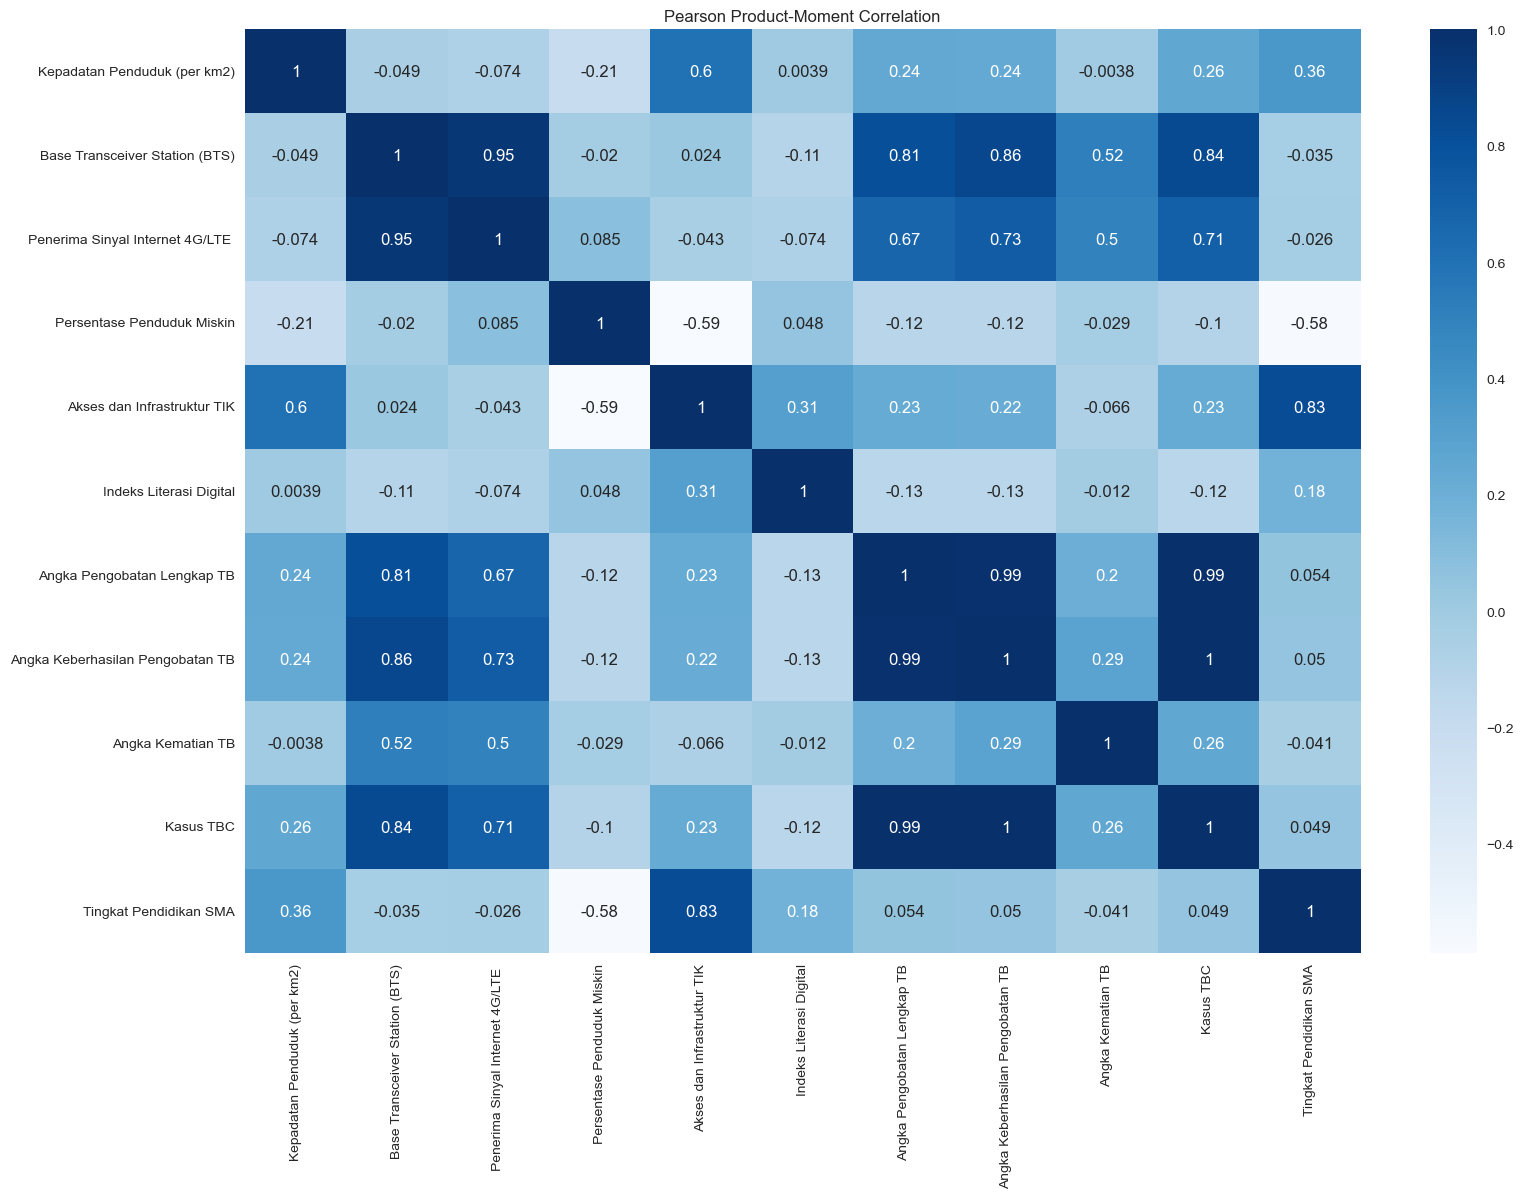

In [7]:
# Heatmap
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.xticks(rotation=90)
plt.title("Pearson Product-Moment Correlation")
plt.show()

In [8]:
df.corr()

,Kepadatan Penduduk (per km2),Base Transceiver Station (BTS),Penerima Sinyal Internet 4G/LTE,Persentase Penduduk Miskin,Akses dan Infrastruktur TIK,Indeks Literasi Digital,Angka Pengobatan Lengkap TB,Angka Keberhasilan Pengobatan TB,Angka Kematian TB,Kasus TBC,Tingkat Pendidikan SMA
Kepadatan Penduduk (per km2),1.000000,-0.048970,-0.074352,-0.208973,0.599580,0.003939,0.244637,0.238922,-0.003838,0.256120,0.363237
Base Transceiver Station (BTS),-0.048970,1.000000,0.950604,-0.020171,0.024473,-0.105883,0.811737,0.863127,0.517606,0.842296,-0.034716
Penerima Sinyal Internet 4G/LTE,-0.074352,0.950604,1.000000,0.084644,-0.043105,-0.074080,0.672845,0.730125,0.500941,0.706838,-0.025963
Persentase Penduduk Miskin,-0.208973,-0.020171,0.084644,1.000000,-0.587961,0.047707,-0.119679,-0.116709,-0.029461,-0.100241,-0.575848
Akses dan Infrastruktur TIK,0.599580,0.024473,-0.043105,-0.587961,1.000000,0.312453,0.230335,0.223526,-0.065740,0.227316,0.828979
Indeks Literasi Digital,0.003939,-0.105883,-0.074080,0.047707,0.312453,1.000000,-0.131169,-0.125695,-0.012012,-0.123242,0.175063
Angka Pengobatan Lengkap TB,0.244637,0.811737,0.672845,-0.119679,0.230335,-0.131169,1.000000,0.992649,0.200521,0.994709,0.053896
Angka Keberhasilan Pengobatan TB,0.238922,0.863127,0.730125,-0.116709,0.223526,-0.125695,0.992649,1.000000,0.290847,0.997894,0.049779
Angka Kematian TB,-0.003838,0.517606,0.500941,-0.029461,-0.065740,-0.012012,0.200521,0.290847,1.000000,0.261208,-0.040570
Kasus TBC,0.256120,0.842296,0.706838,-0.100241,0.227316,-0.123242,0.994709,0.997894,0.261208,1.000000,0.048523


In [9]:
# Mengatur kolom 'Provinsi' sebagai index
df.set_index('Provinsi', inplace=True)

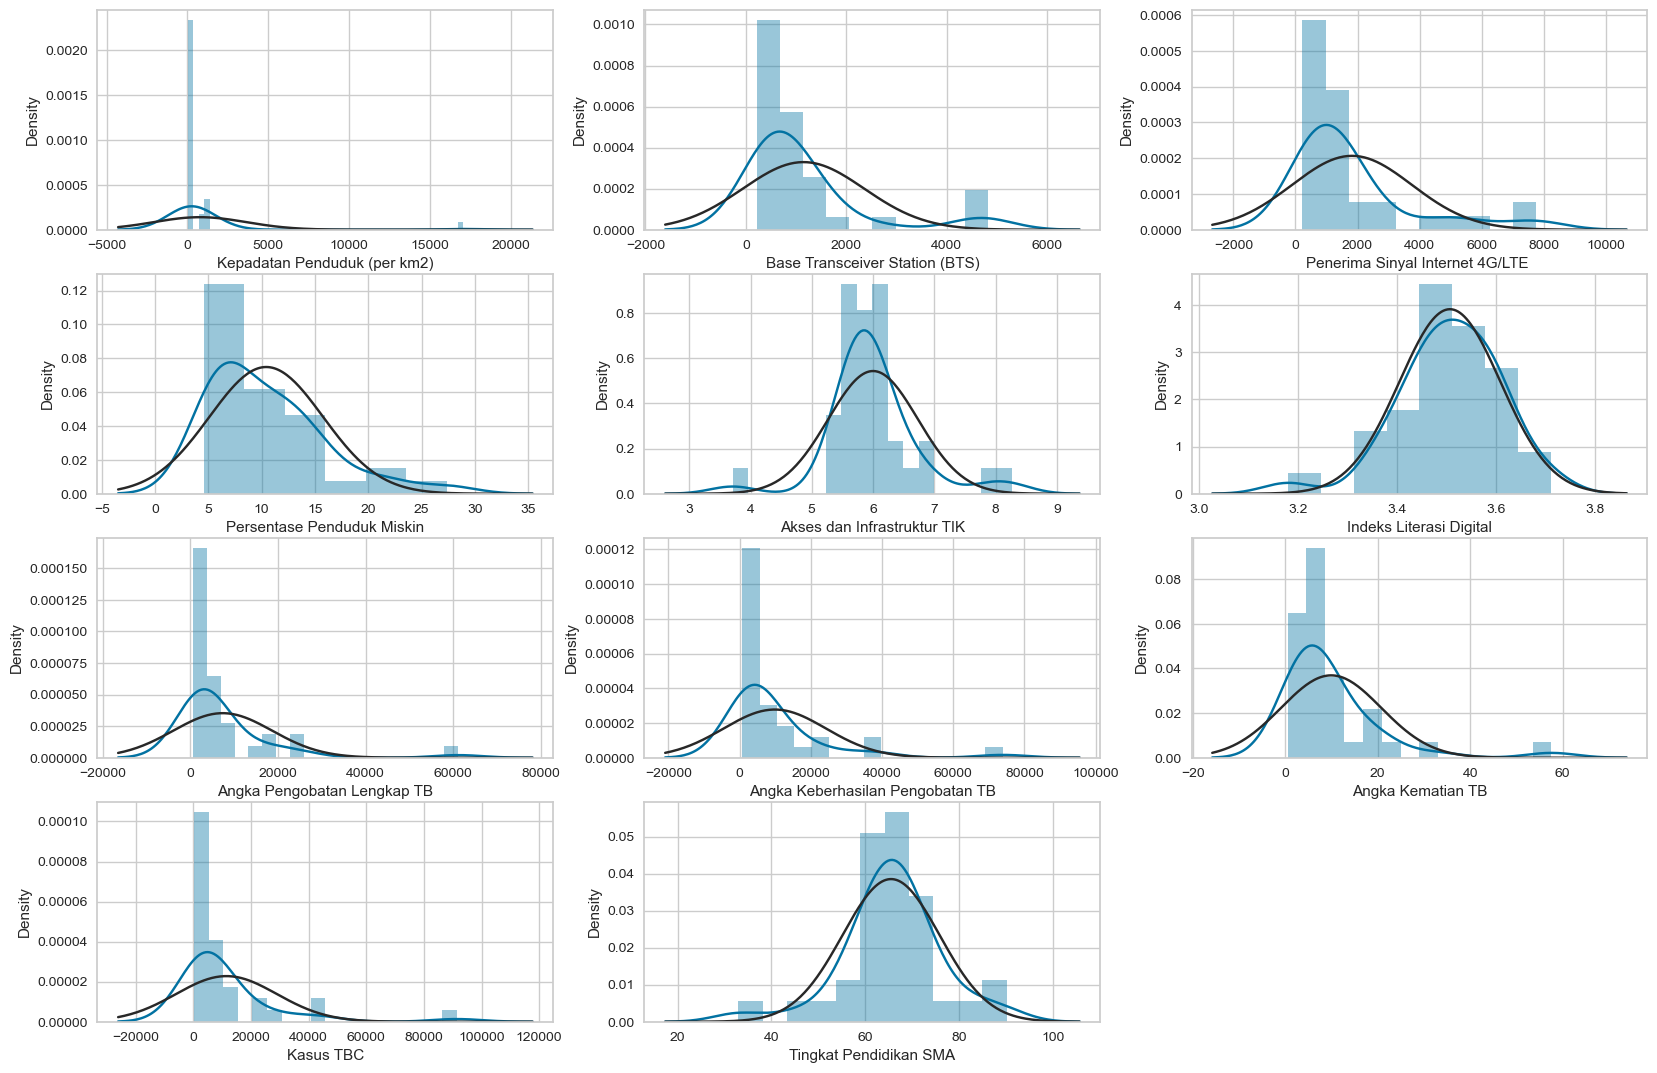

In [10]:
from scipy.stats import norm

plt.figure(figsize=(20,20))
for i, col in enumerate(df.columns):
    ax = plt.subplot(6, 3, i+1)
    sns.distplot(df[col], ax=ax, fit=norm)
    plt.xlabel(col)
plt.show()

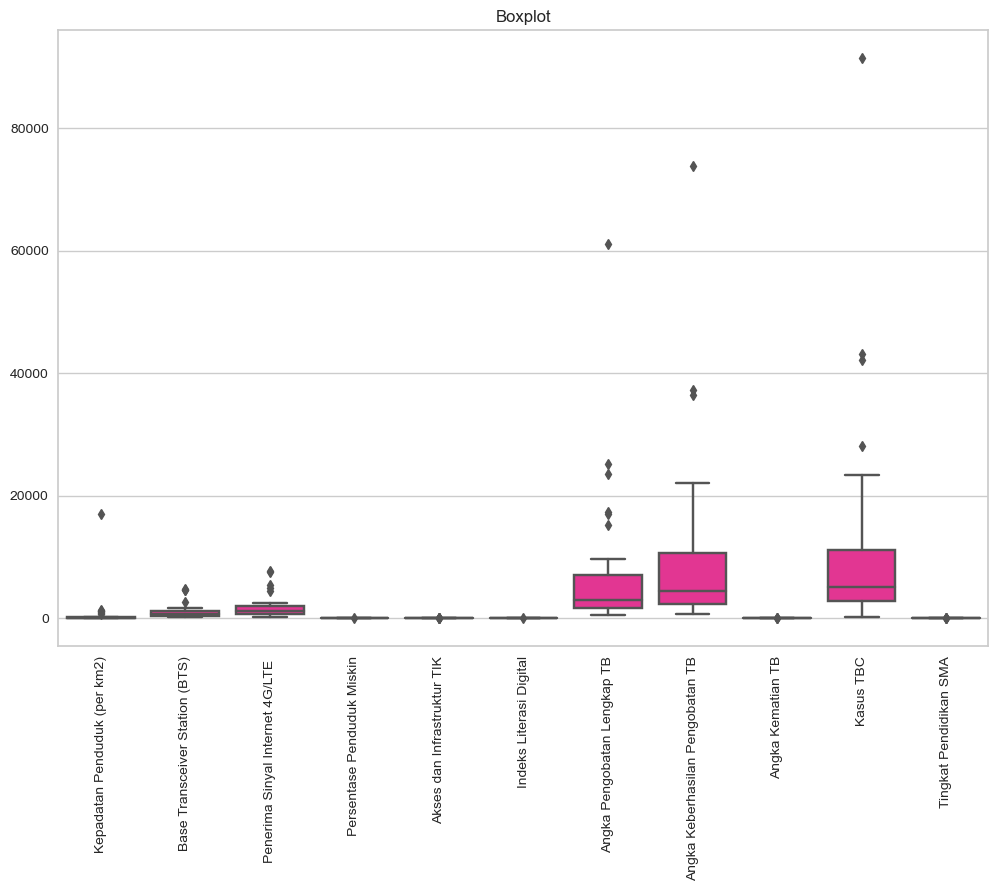

In [11]:
# Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(df, showfliers=True, color='#FF1994')  # Menghilangkan pencilan untuk melihat lebih jelas
plt.title('Boxplot')
plt.xticks(rotation='vertical')  # Memutar label sumbu x
plt.show()

In [12]:
df.columns

Index(['Kepadatan Penduduk (per km2)', 'Base Transceiver Station (BTS)',
       'Penerima Sinyal Internet 4G/LTE ', 'Persentase Penduduk Miskin',
       'Akses dan Infrastruktur TIK', 'Indeks Literasi Digital',
       'Angka Pengobatan Lengkap TB', 'Angka Keberhasilan Pengobatan TB',
       'Angka Kematian TB', 'Kasus TBC', 'Tingkat Pendidikan SMA'],
      dtype='object')

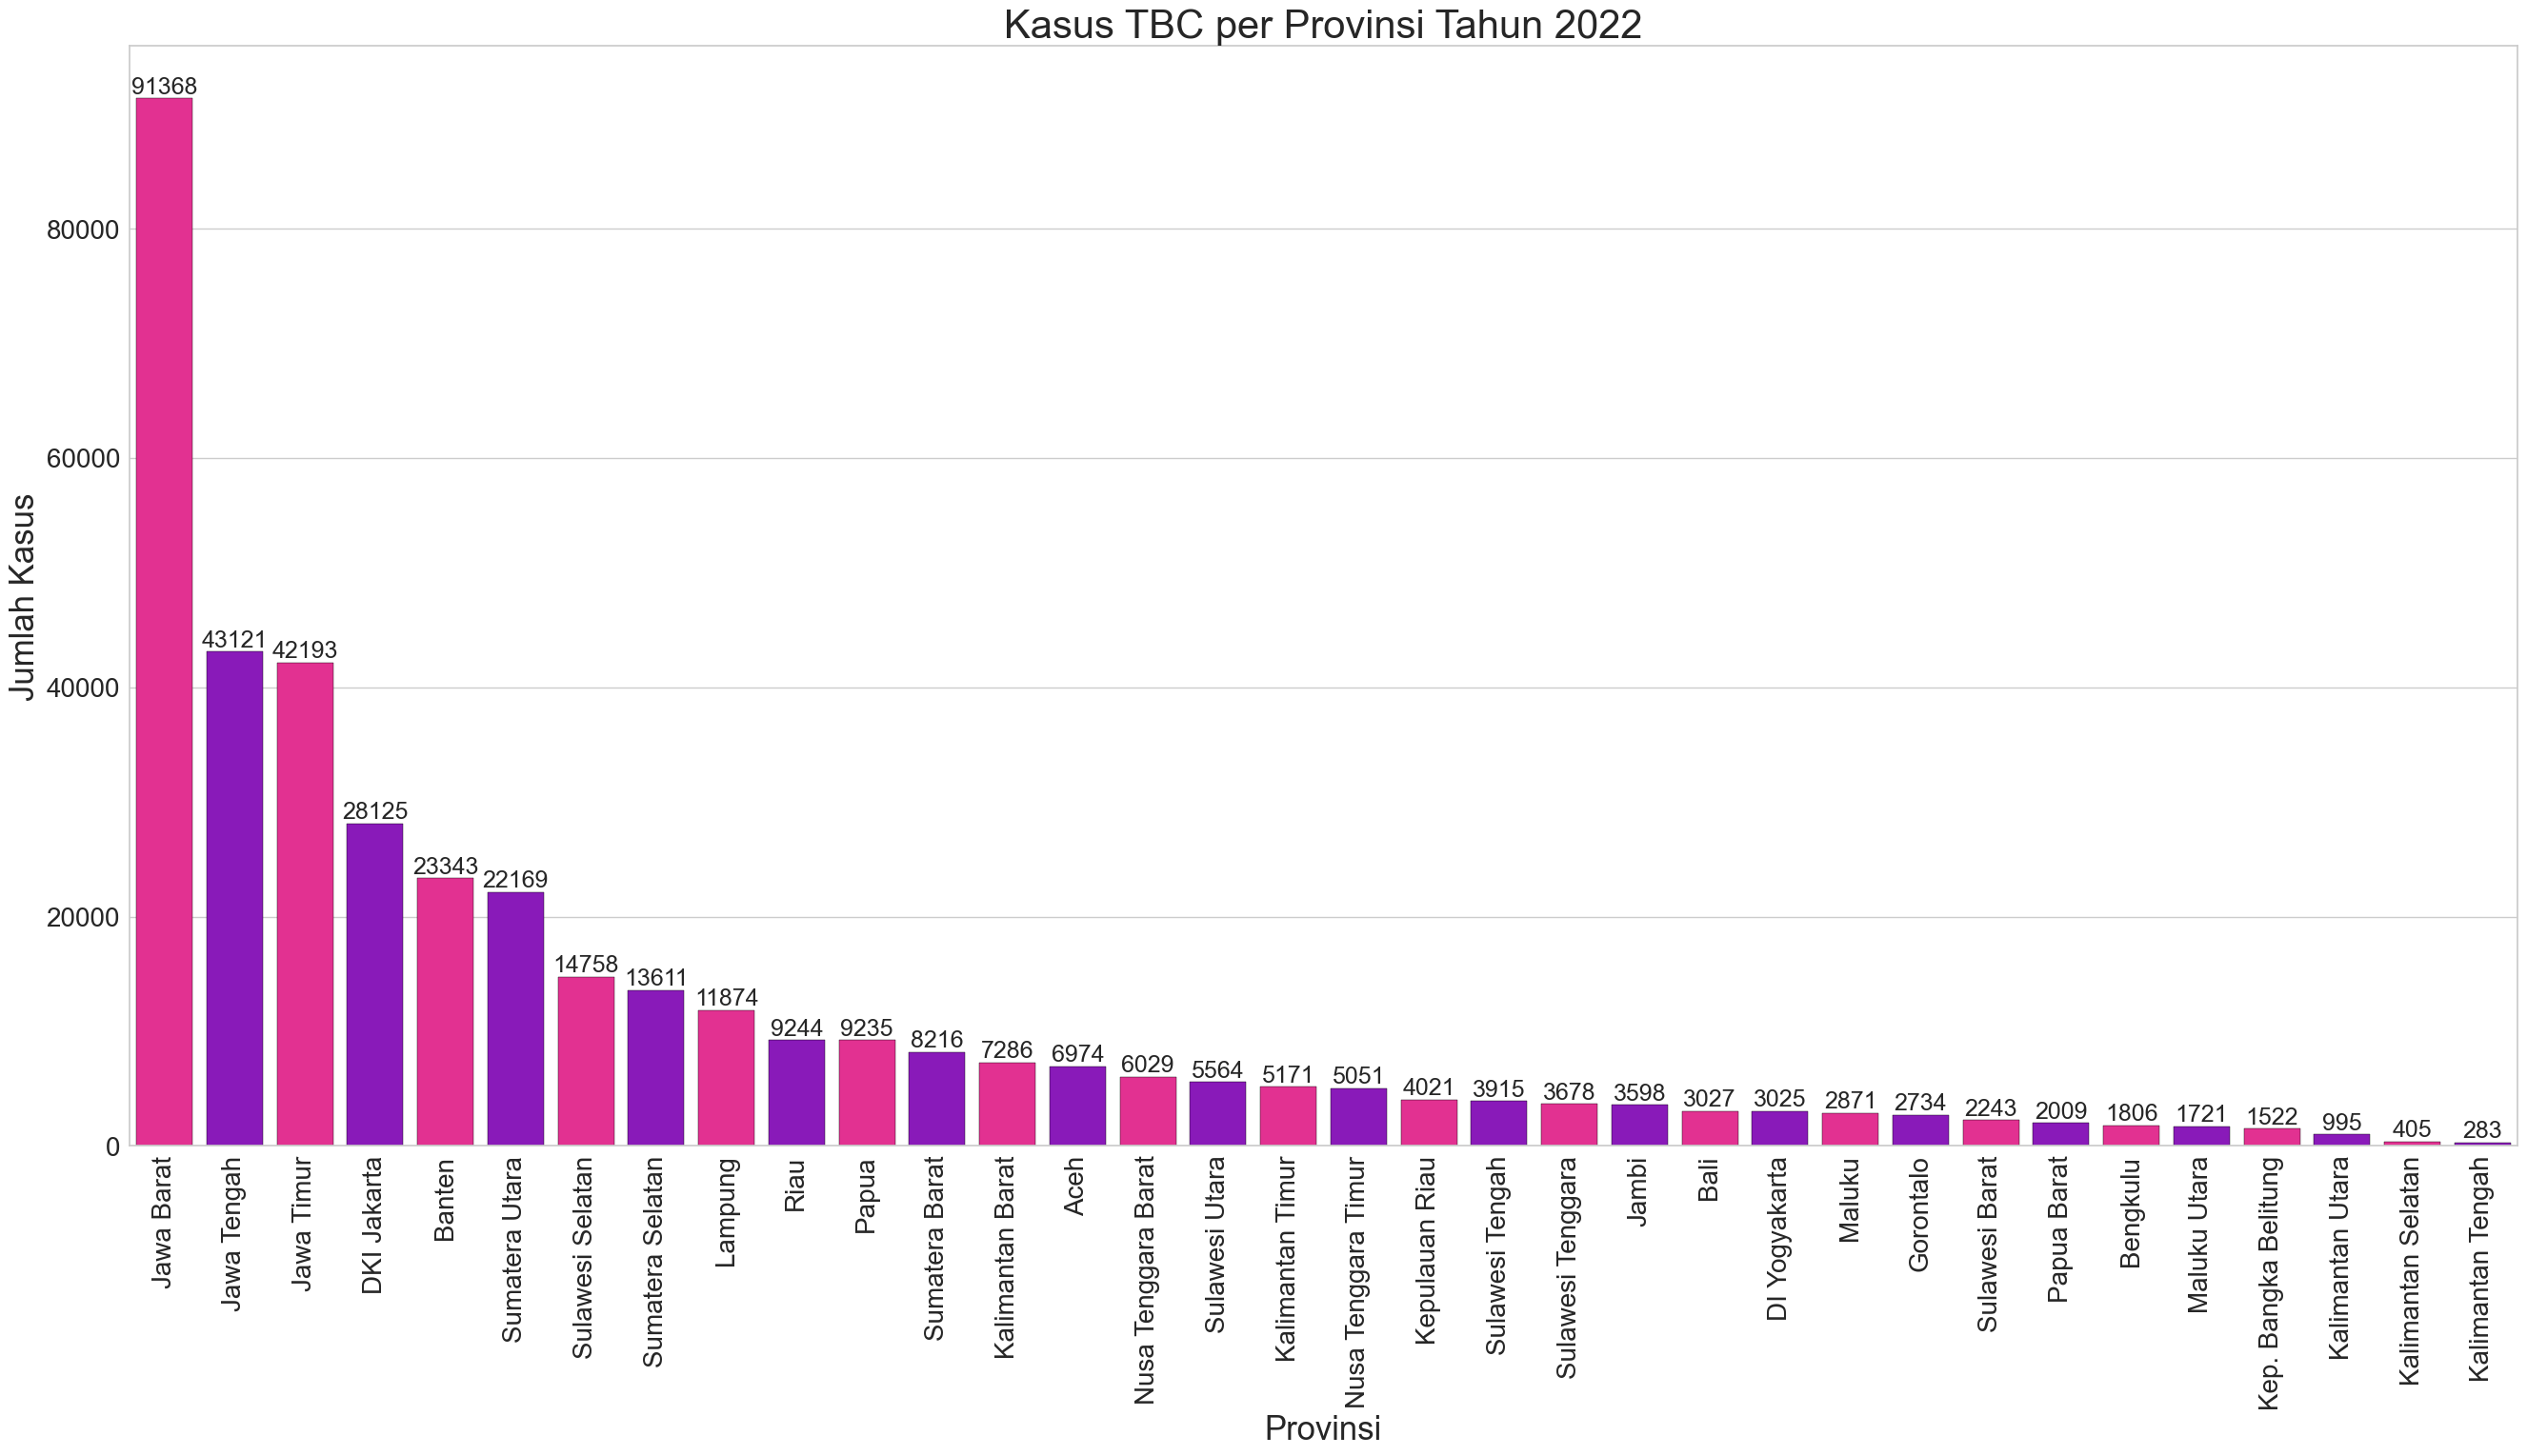

In [13]:
plt.figure(figsize=(110, 15))
colors = 'deeppink', 'darkviolet'

# Plot semua data dalam satu subplot
plt.subplot(1, 3, 1)
tbc = df.sort_values(by='Kasus TBC', ascending=False)
ax1 = sns.barplot(x=tbc.index, y='Kasus TBC', data=tbc, palette=colors, edgecolor='black')
plt.title('Kasus TBC per Provinsi Tahun 2022', fontsize=30)  # Ubah ukuran font judul
plt.xticks(rotation=90, fontsize=20)  # Ubah ukuran font dan rotasi label sumbu x
plt.yticks(fontsize=20)  # Ubah ukuran font label sumbu y
plt.xlabel('Provinsi', fontsize=25)  # Ubah ukuran font label sumbu x
plt.ylabel('Jumlah Kasus', fontsize=25)  # Ubah ukuran font label sumbu y
for rect in ax1.patches:
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom', fontsize=18)  # Ubah ukuran font nilai di bar

plt.show()

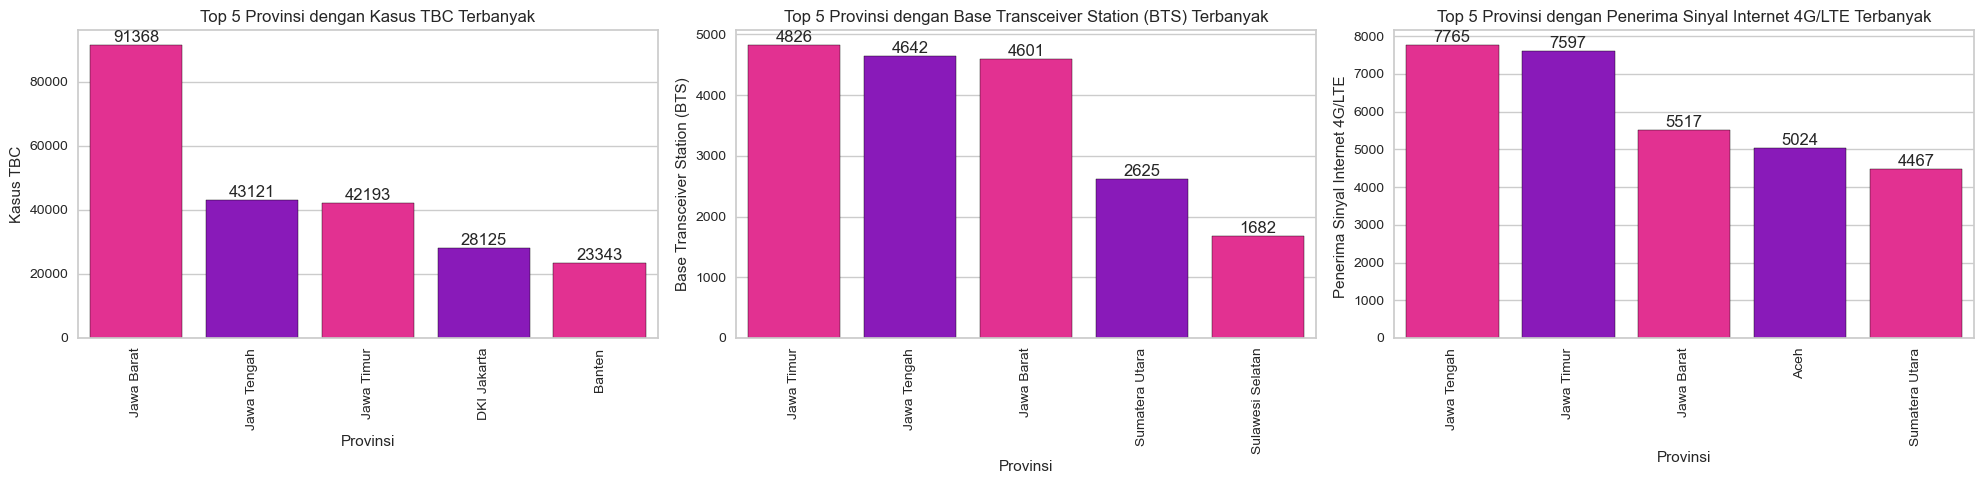

In [14]:
plt.figure(figsize=(20, 5))
colors = 'deeppink', 'darkviolet'

# Plot semua data dalam satu subplot
plt.subplot(1, 3, 1)
top_5_tbc = df.sort_values(by='Kasus TBC', ascending=False).head(5)
ax1 = sns.barplot(x=top_5_tbc.index, y='Kasus TBC', data=top_5_tbc, palette=colors, edgecolor='black')
plt.title('Top 5 Provinsi dengan Kasus TBC Terbanyak')
plt.xticks(rotation=90)
for rect in ax1.patches:
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')

# Plot Base Transceiver Station (BTS)
plt.subplot(1, 3, 2)
top_5_bts = df.sort_values(by='Base Transceiver Station (BTS)', ascending=False).head(5)
ax2 = sns.barplot(x=top_5_bts.index, y='Base Transceiver Station (BTS)', data=top_5_bts, palette=colors, edgecolor='black')
plt.title('Top 5 Provinsi dengan Base Transceiver Station (BTS) Terbanyak')
plt.xticks(rotation=90)
for rect in ax2.patches:
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')

# Plot Penerima Sinyal Internet 4G/LTE
plt.subplot(1, 3, 3)
top_5_internet = df.sort_values(by='Penerima Sinyal Internet 4G/LTE ', ascending=False).head(5)
ax3 = sns.barplot(x=top_5_internet.index, y='Penerima Sinyal Internet 4G/LTE ', data=top_5_internet, palette=colors, edgecolor='black')
plt.title('Top 5 Provinsi dengan Penerima Sinyal Internet 4G/LTE Terbanyak')
plt.xticks(rotation=90)
for rect in ax3.patches:
    height = rect.get_height()
    ax3.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Dari hasil di atas, terlihat bahwa terjadi penyimpangan yang cukup jauh dengan 3 provinsi yaitu Jwa Barat, Jawa Tengah, dan Jawa Timur adalah prvinsi dengan Kasus TBC, BTS, dan Penerima Sinyal 4GLTE terbanyak dibandingkan dengan provinsi lainnya. Hal ini bisa menjadi gambaran untuk proses analisis clustering nantinya.

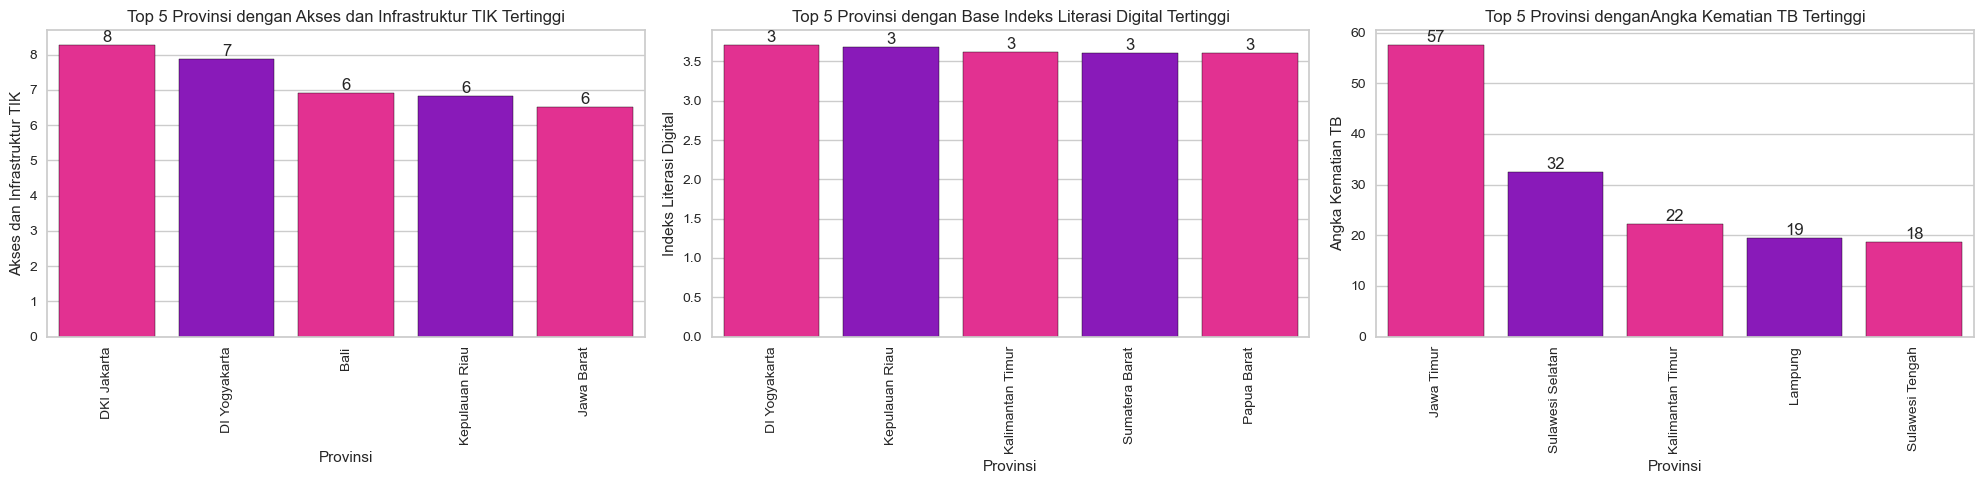

In [15]:
plt.figure(figsize=(20, 5))
colors = 'deeppink', 'darkviolet'

# Plot semua data dalam satu subplot
plt.subplot(1, 3, 1)
top_5_tbc = df.sort_values(by='Akses dan Infrastruktur TIK', ascending=False).head(5)
ax1 = sns.barplot(x=top_5_tbc.index, y='Akses dan Infrastruktur TIK', data=top_5_tbc, palette=colors, edgecolor='black')
plt.title('Top 5 Provinsi dengan Akses dan Infrastruktur TIK Tertinggi')
plt.xticks(rotation=90)
for rect in ax1.patches:
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')

# Plot Base Transceiver Station (BTS)
plt.subplot(1, 3, 2)
top_5_bts = df.sort_values(by='Indeks Literasi Digital', ascending=False).head(5)
ax2 = sns.barplot(x=top_5_bts.index, y='Indeks Literasi Digital', data=top_5_bts, palette=colors, edgecolor='black')
plt.title('Top 5 Provinsi dengan Base Indeks Literasi Digital Tertinggi')
plt.xticks(rotation=90)
for rect in ax2.patches:
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')

# Plot Penerima Sinyal Internet 4G/LTE
plt.subplot(1, 3, 3)
top_5_internet = df.sort_values(by='Angka Kematian TB', ascending=False).head(5)
ax3 = sns.barplot(x=top_5_internet.index, y='Angka Kematian TB', data=top_5_internet, palette=colors, edgecolor='black')
plt.title('Top 5 Provinsi denganAngka Kematian TB Tertinggi')
plt.xticks(rotation=90)
for rect in ax3.patches:
    height = rect.get_height()
    ax3.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Pre Processing Data

In [16]:
# Transformasi data menggunakan zscore
df_t = df.copy().apply(zscore,ddof=1)
df_t.head(10)

,Kepadatan Penduduk (per km2),Base Transceiver Station (BTS),Penerima Sinyal Internet 4G/LTE,Persentase Penduduk Miskin,Akses dan Infrastruktur TIK,Indeks Literasi Digital,Angka Pengobatan Lengkap TB,Angka Keberhasilan Pengobatan TB,Angka Kematian TB,Kasus TBC,Tingkat Pendidikan SMA
Provinsi,,,,,,,,,,,
Aceh,-0.234136,0.361327,1.632149,0.942894,-0.430973,0.613401,-0.186554,-0.260745,-0.446331,-0.254904,0.841979
Sumatera Utara,-0.194126,1.200946,1.348288,-0.357994,-0.256372,-0.062476,0.683905,0.689885,-0.375773,0.599849,0.694504
Sumatera Barat,-0.220685,-0.169943,-0.380360,-0.810718,0.092831,0.999617,-0.218812,-0.187340,-0.293609,-0.185038,0.432854
Riau,-0.241379,0.092844,-0.158164,-0.633324,-0.001185,-1.510784,-0.074346,-0.103312,-0.371289,-0.127211,0.326292
Jambi,-0.241035,-0.326151,-0.296272,-0.509518,0.012246,-0.931461,-0.454474,-0.463825,-0.037109,-0.444811,-0.095201
Sumatera Selatan,-0.232412,0.286477,0.341778,0.436582,-0.148925,-0.641799,0.208222,0.171391,0.201981,0.118442,0.160739
Bengkulu,-0.231722,-0.569413,-0.323282,0.739630,-0.148925,-0.062476,-0.544450,-0.568552,-0.805560,-0.545615,-0.290249
Lampung,-0.175156,0.205119,0.176150,0.229623,-0.417542,0.130632,-0.011573,0.109775,0.868683,0.020732,-0.515743
Kep. Bangka Belitung,-0.236206,-0.651585,-0.738117,-1.063874,0.065969,0.613401,-0.561364,-0.588085,-0.484536,-0.561591,-0.145628


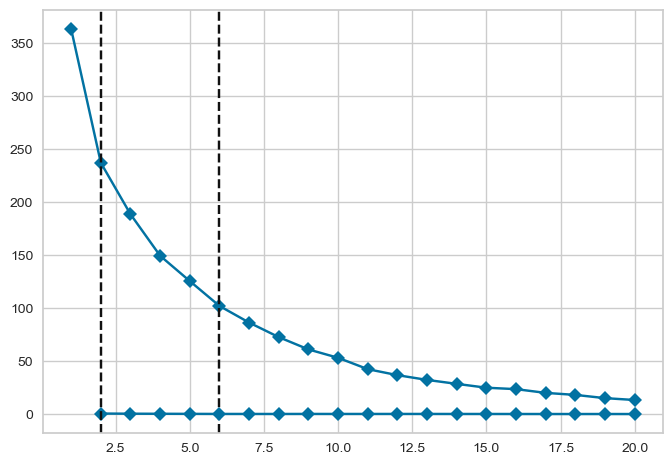

In [18]:
random_state = 13
start = 1
end = 20

scores,elbows_indexes,elbows_scores,methods = [],[],[],["distortion","silhouette"]

for method in methods:
    if method == "silhouette":
        start = 2
    
    kmeans_model = KMeans(init="k-means++",random_state=random_state)
    visualizer = KElbowVisualizer(kmeans_model,k=(start,end + 1),metric=method,timings=False)
    visualizer.fit(df_t)
    scores.append(visualizer.k_scores_)
    elbows_indexes.append(visualizer.elbow_value_)
    elbows_scores.append(visualizer.elbow_score_)

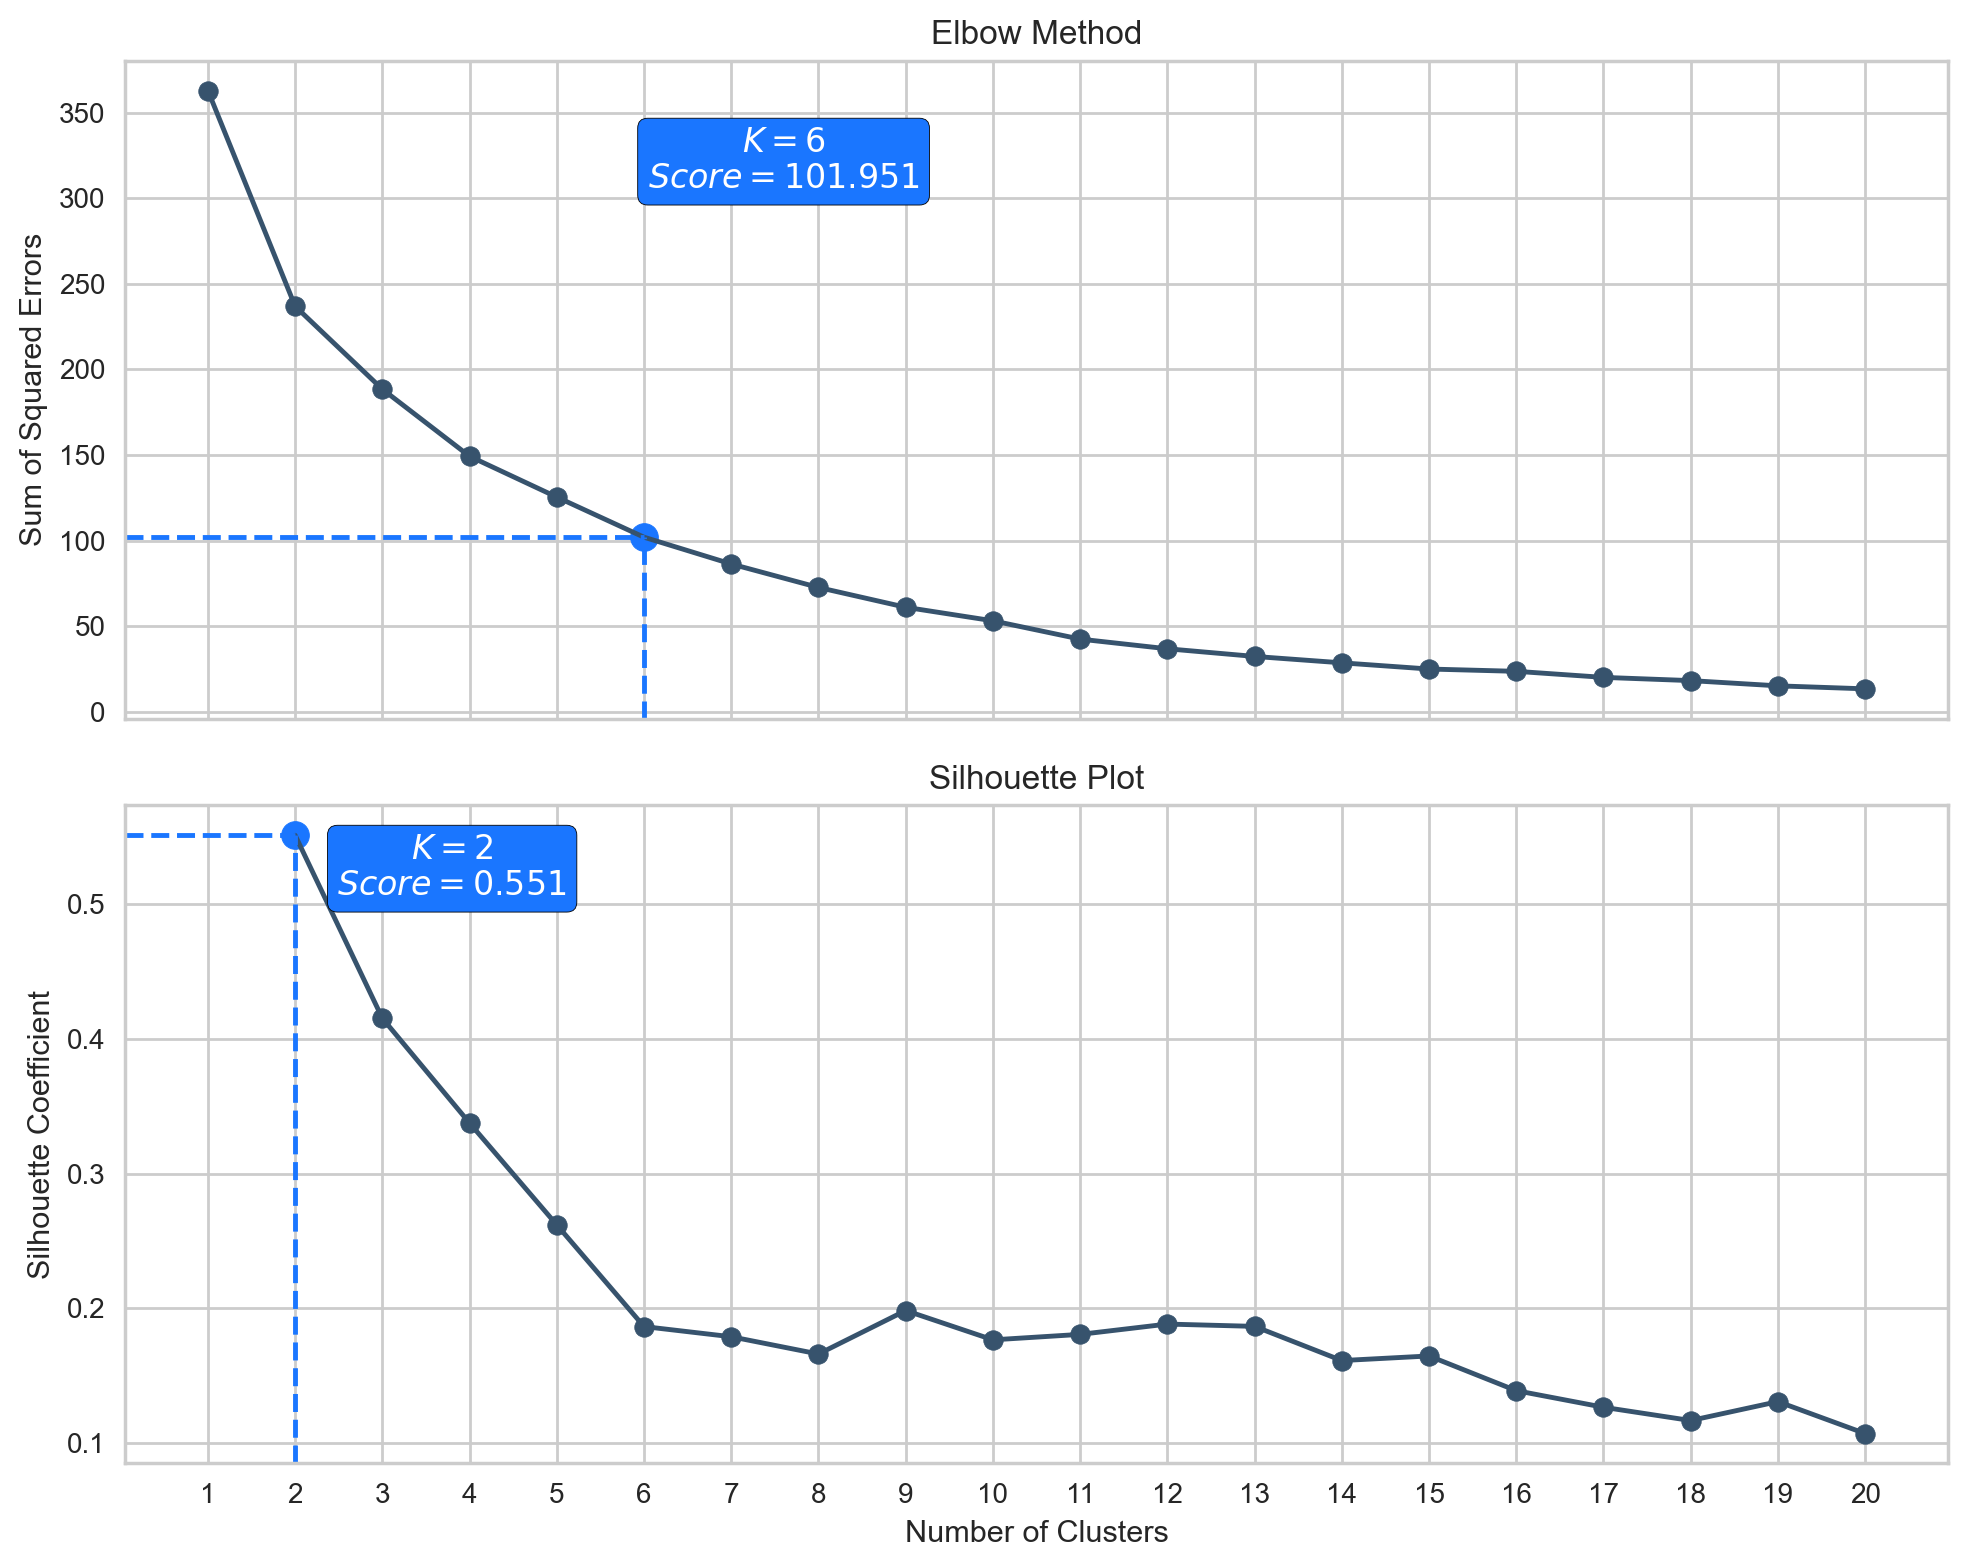

In [19]:
# Visualisasi Metode Elbow dan Metode Silhoutte

start = 1
end = 20

fig,ax = plt.subplots(2,1,figsize=(10,8),dpi=200,sharex=True)

# Elbow Method
ax[0].plot(range(start,end + 1),scores[0],color="#37536d")
ax[0].scatter(range(start,end + 1),scores[0],color="#37536d")
ax[0].scatter(elbows_indexes[0],elbows_scores[0],color="#1a76ff",s=100)
ax[0].set_xticks(range(start,end + 1))

xmin,xmax = ax[0].get_xlim()
ymin,ymax = ax[0].get_ylim()

ax[0].plot((xmin,elbows_indexes[0]),(elbows_scores[0],elbows_scores[0]),color="#1a76ff",linestyle="--")
ax[0].plot((elbows_indexes[0],elbows_indexes[0]),(ymin,elbows_scores[0]),color="#1a76ff",linestyle="--")
ax[0].set_xlim(xmin,xmax)
ax[0].set_ylim(ymin,ymax)
ax[0].set_title("Elbow Method")
ax[0].set_ylabel("Sum of Squared Errors")
ax[0].text(
    x=elbows_indexes[0] + 1.6,
    y=elbows_scores[0] + 2_00,
    horizontalalignment="center",
    verticalalignment="bottom",
    s=f"$ K = {elbows_indexes[0]} $\n$ Score = {round(elbows_scores[0],3)} $",
    color="white",
    fontweight="bold",
    bbox=dict(x=0,facecolor="#1a76ff",boxstyle="round"),
)

# Silhouette Plot
ax[1].plot(range(start + 1,end + 1),scores[1],color="#37536d")
ax[1].scatter(range(start + 1,end + 1),scores[1],color="#37536d")
ax[1].scatter(elbows_indexes[1],elbows_scores[1],color="#1a76ff",s=100)
ax[1].set_xticks(range(start,end + 1))

xmin,xmax = ax[1].get_xlim()
ymin,ymax = ax[1].get_ylim()

ax[1].plot((xmin,elbows_indexes[1]),(elbows_scores[1],elbows_scores[1]),color="#1a76ff",linestyle="--")
ax[1].plot((elbows_indexes[1],elbows_indexes[1]),(ymin,elbows_scores[1]),color="#1a76ff",linestyle="--")
ax[1].set_xlim(xmin,xmax)
ax[1].set_ylim(ymin,ymax)
ax[1].set_title("Silhouette Plot")
ax[1].set_xlabel("Number of Clusters")
ax[1].set_ylabel("Silhouette Coefficient")
ax[1].text(
    x=elbows_indexes[1] + 1.8,
    y=elbows_scores[1],
    horizontalalignment="center",
    verticalalignment="top",
    s=f"$ K = {elbows_indexes[1]} $\n$ Score = {round(elbows_scores[1],3)} $",
    color="white",
    fontweight="bold",
    bbox=dict(x=0,facecolor="#1a76ff",boxstyle="round")
)

plt.tight_layout()
plt.show()

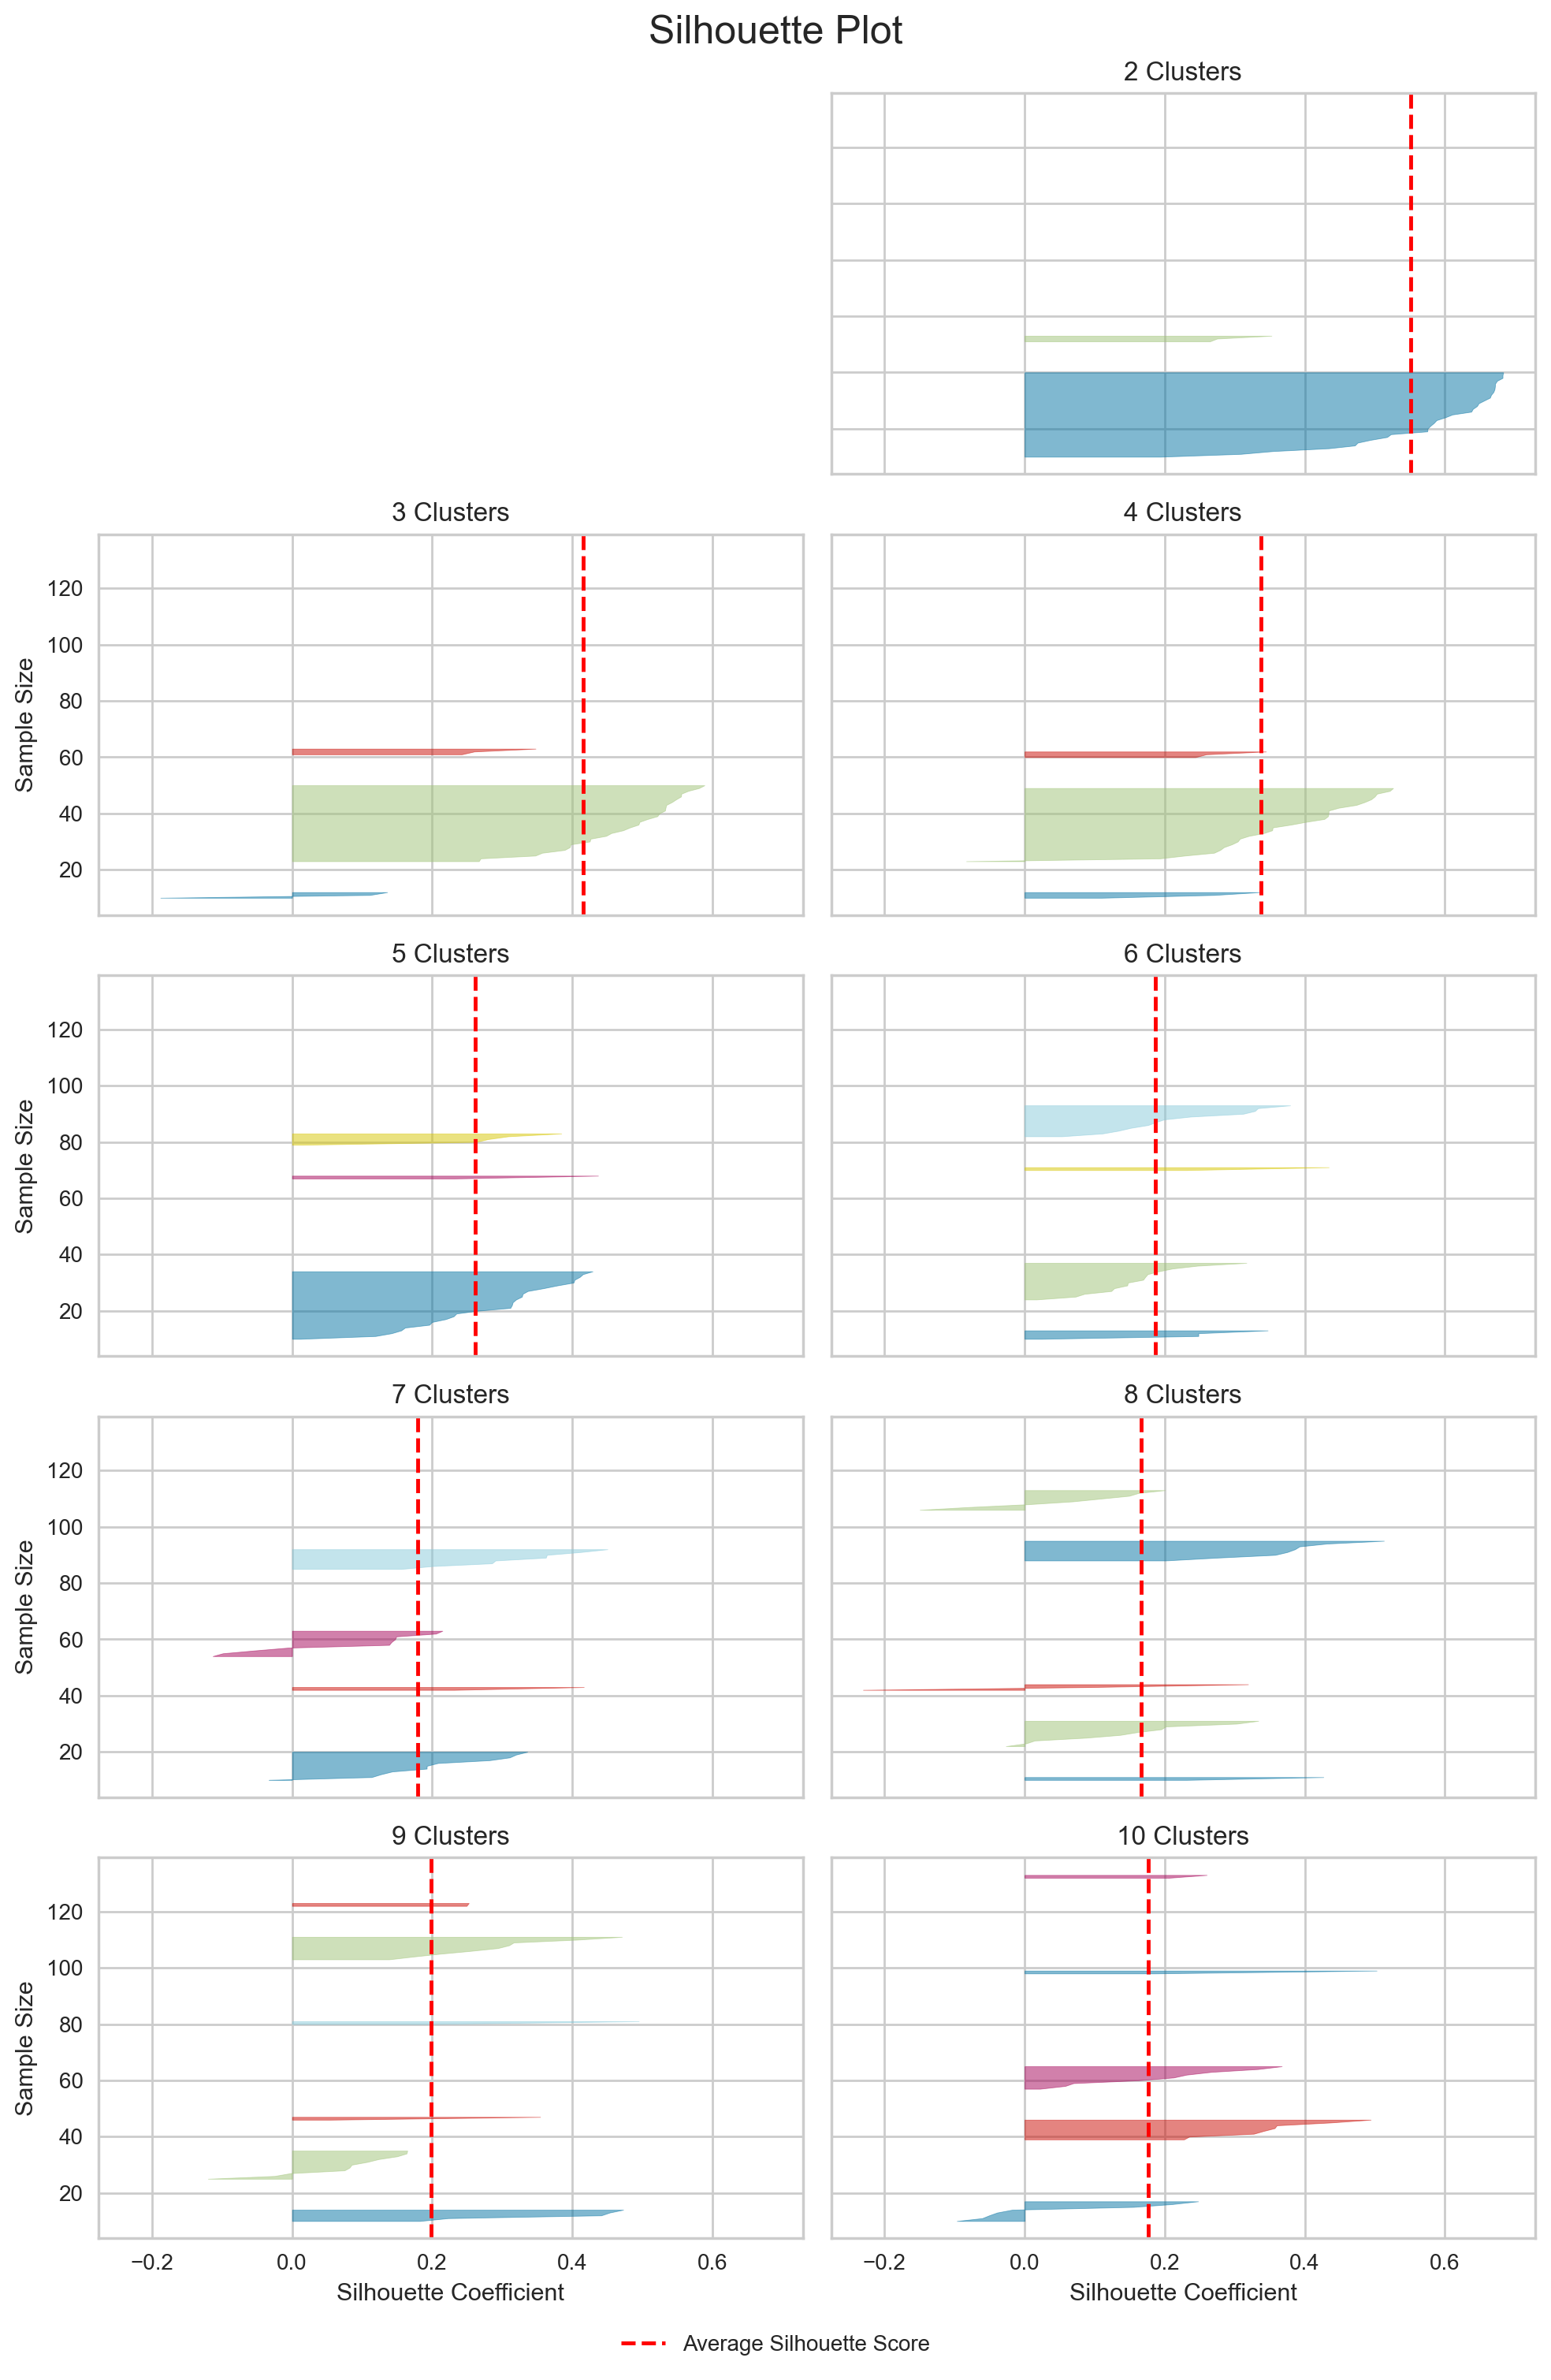

In [20]:
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer

start = 2
end = 10

nrow,ncol = 5,2
fig,ax = plt.subplots(nrow,ncol,figsize=(10,15),dpi=200,sharex=True,sharey=True)

for k in range(start,end + 2):
    q,mod = divmod(k,2)

    if ((q - 1) == 0) & (mod == 0):
        pass
    else:
        k -= 1
        kmeans_model = KMeans(n_clusters=k,init="k-means++",random_state=random_state)
        visualizer = SilhouetteVisualizer(kmeans_model,colors="yellowbrick",ax=ax[q - 1][mod])
        visualizer.fit(df_t)

        ax[q - 1][mod].set_title(f"{k} Clusters")
        
        if mod == 0:
            ax[q - 1][mod].set_ylabel("Sample Size")
        if (q - 1) == (nrow - 1):
            ax[q - 1][mod].set_xlabel("Silhouette Coefficient")

for axes in ax.flat:
    if not bool(axes.has_data()):
        fig.delaxes(axes)
    
handles,labels = ax[q - 1][mod].get_legend_handles_labels()
fig.legend(handles,labels,loc="center",bbox_to_anchor=(0.5,-0.005))

plt.suptitle("Silhouette Plot",fontsize=18)
plt.tight_layout()
plt.show()

# K-Means

In [21]:
kmeans_model = KMeans(n_clusters=2, init='k-means++', random_state=21)
kmeans_model.fit(df_t)

KMeans(n_clusters=2, random_state=21)

In [22]:
# Menginisialisasi dan melatih model KMedoids
kmeans_model = KMeans(n_clusters=2, init='k-means++', random_state=3)
kmeans_model.fit(df_t)

# Menyimpan pusat klaster untuk setiap iterasi
clusters = []
for iteration in range(1, kmeans_model.n_iter_ + 1):
    temp_model = KMeans(n_clusters=2, init='k-means++', random_state=3, max_iter=iteration)
    temp_model.fit(df_t)
    clusters.append(temp_model.cluster_centers_)

# Mengatur data untuk DataFrame
cluster_data = np.vstack(clusters)

# Membuat MultiIndex untuk DataFrame
first_index = sum([[f"Iteration {iteration}" for _ in range(kmeans_model.n_clusters)] for iteration in range(1, kmeans_model.n_iter_ + 1)], [])
second_index = [f"Cluster {cluster + 1}" for cluster in range(kmeans_model.n_clusters)] * kmeans_model.n_iter_
multi_index = pd.MultiIndex.from_arrays([first_index, second_index])

# Membuat DataFrame dari sejarah iterasi pusat klaster
iteration_history = pd.DataFrame(
    data=cluster_data,
    columns=df.columns,
    index=multi_index
)
iteration_history

Kepadatan Penduduk (per km2)  \
Iteration 1 Cluster 1                      0.106410   
            Cluster 2                     -0.010298   
Iteration 2 Cluster 1                      0.106410   
            Cluster 2                     -0.010298   

                       Base Transceiver Station (BTS)  \
Iteration 1 Cluster 1                        2.880726   
            Cluster 2                       -0.278780   
Iteration 2 Cluster 1                        2.880726   
            Cluster 2                       -0.278780   

                       Penerima Sinyal Internet 4G/LTE   \
Iteration 1 Cluster 1                          2.618613   
            Cluster 2                         -0.253414   
Iteration 2 Cluster 1                          2.618613   
            Cluster 2                         -0.253414   

                       Persentase Penduduk Miskin  \
Iteration 1 Cluster 1                   -0.090672   
            Cluster 2                    0.008775   
Iteration 2 Cluster 1                   -0.090672   
            Cluster 2                    0.008775   

                       Akses dan Infrastruktur TIK  Indeks Literasi Digital  \
Iteration 1 Cluster 1                     0.352494                -0.126845   
            Cluster 2                    -0.034112                 0.012275   
Iteration 2 Cluster 1                     0.352494                -0.126845   
            Cluster 2                    -0.034112                 0.012275   

                       Angka Pengobatan Lengkap TB  \
Iteration 1 Cluster 1                     2.545953   
            Cluster 2                    -0.246383   
Iteration 2 Cluster 1                     2.545953   
            Cluster 2                    -0.246383   

                       Angka Keberhasilan Pengobatan TB  Angka Kematian TB  \
Iteration 1 Cluster 1                          2.692561           1.460232   
            Cluster 2                         -0.260570          -0.141313   
Iteration 2 Cluster 1                          2.692561           1.460232   
            Cluster 2                         -0.260570          -0.141313   

                       Kasus TBC  Tingkat Pendidikan SMA  
Iteration 1 Cluster 1   2.665711               -0.171634  
            Cluster 2  -0.257972                0.016610  
Iteration 2 Cluster 1   2.665711               -0.171634  
            Cluster 2  -0.257972                0.016610

In [23]:
final_cluster_centers = pd.DataFrame(
    data=kmeans_model.cluster_centers_,
    columns=df_t.columns,
    index=[f"Cluster {cluster}" for cluster in range(kmeans_model.n_clusters)]
).T
final_cluster_centers

,Cluster 0,Cluster 1
Kepadatan Penduduk (per km2),0.106410,-0.010298
Base Transceiver Station (BTS),2.880726,-0.278780
Penerima Sinyal Internet 4G/LTE,2.618613,-0.253414
Persentase Penduduk Miskin,-0.090672,0.008775
Akses dan Infrastruktur TIK,0.352494,-0.034112
Indeks Literasi Digital,-0.126845,0.012275
Angka Pengobatan Lengkap TB,2.545953,-0.246383
Angka Keberhasilan Pengobatan TB,2.692561,-0.260570
Angka Kematian TB,1.460232,-0.141313
Kasus TBC,2.665711,-0.257972


In [24]:
df_labeled = df_t.copy()
df_labeled["Cluster"] = kmeans_model.labels_
df_labeled["Distance"] = np.min(kmeans_model.transform(df_t),axis=1)
df_labeled

,Kepadatan Penduduk (per km2),Base Transceiver Station (BTS),Penerima Sinyal Internet 4G/LTE,Persentase Penduduk Miskin,Akses dan Infrastruktur TIK,Indeks Literasi Digital,Angka Pengobatan Lengkap TB,Angka Keberhasilan Pengobatan TB,Angka Kematian TB,Kasus TBC,Tingkat Pendidikan SMA,Cluster,Distance
Provinsi,,,,,,,,,,,,,
Aceh,-0.234136,0.361327,1.632149,0.942894,-0.430973,0.613401,-0.186554,-0.260745,-0.446331,-0.254904,0.841979,1,2.486861
Sumatera Utara,-0.194126,1.200946,1.348288,-0.357994,-0.256372,-0.062476,0.683905,0.689885,-0.375773,0.599849,0.694504,1,2.827986
Sumatera Barat,-0.220685,-0.169943,-0.380360,-0.810718,0.092831,0.999617,-0.218812,-0.187340,-0.293609,-0.185038,0.432854,1,1.393788
Riau,-0.241379,0.092844,-0.158164,-0.633324,-0.001185,-1.510784,-0.074346,-0.103312,-0.371289,-0.127211,0.326292,1,1.775917
Jambi,-0.241035,-0.326151,-0.296272,-0.509518,0.012246,-0.931461,-0.454474,-0.463825,-0.037109,-0.444811,-0.095201,1,1.166884
Sumatera Selatan,-0.232412,0.286477,0.341778,0.436582,-0.148925,-0.641799,0.208222,0.171391,0.201981,0.118442,0.160739,1,1.421509
Bengkulu,-0.231722,-0.569413,-0.323282,0.739630,-0.148925,-0.062476,-0.544450,-0.568552,-0.805560,-0.545615,-0.290249,1,1.221932
Lampung,-0.175156,0.205119,0.176150,0.229623,-0.417542,0.130632,-0.011573,0.109775,0.868683,0.020732,-0.515743,1,1.493024
Kep. Bangka Belitung,-0.236206,-0.651585,-0.738117,-1.063874,0.065969,0.613401,-0.561364,-0.588085,-0.484536,-0.561591,-0.145628,1,1.545861


In [25]:
# Membuat radar chart untuk melihat karakteristik klaster
features = list(df_labeled.columns[:-2])
num_vars = len(features)

In [26]:
# Jumlah klaster
n_clusters = len(df_labeled['Cluster'].unique())

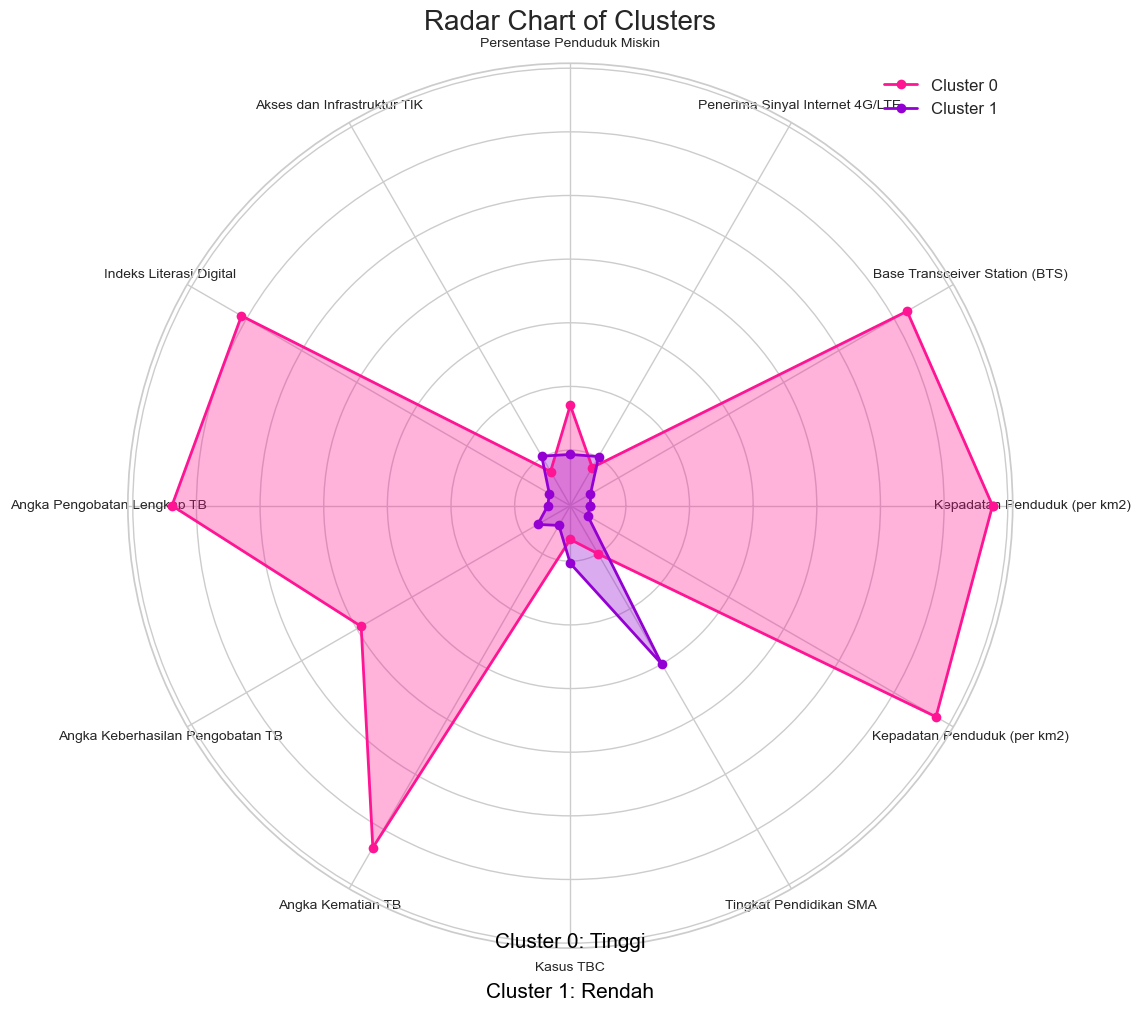

In [27]:
# Daftar warna yang akan digunakan untuk setiap klaster
colors = ['deeppink', 'darkviolet']

# Plot radar chart
plt.figure(figsize=(15, 10))

for i in range(n_clusters):
    cluster_data = df_labeled[df_labeled['Cluster'] == i].mean()[1:-1].values
    values = cluster_data
    categories = features

    # Menambahkan kategori pertama ke akhir untuk melengkapi lingkaran radar
    values = np.concatenate((values, [values[0]]))
    categories = np.concatenate((categories, [categories[0]]))

    # Jumlah sudut yang akan digunakan dalam radar chart
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()

    # Menambahkan sudut pertama ke akhir untuk melengkapi lingkaran radar
    values = np.concatenate((values, [values[0]]))
    angles += angles[:1]

    # Membuat plot dengan warna yang berbeda untuk setiap klaster
    ax = plt.subplot(1, 1, 1, polar=True)
    ax.fill(angles, values, color=colors[i], alpha=0.1)
    ax.plot(angles, values, 'o-', color=colors[i], linewidth=2, label='Cluster {}'.format(i))
    ax.fill(angles, values, color=colors[i], alpha=0.25)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, size=10)
    plt.yticks(size=10)

    # Menambahkan keterangan klaster
    cluster_label = 'Rendah' if i == 1 else 'Tinggi'
    plt.figtext(0.5, 0.05 - i * 0.05, 'Cluster {}: {}'.format(i, cluster_label),
                ha='center', va='center', size=15, color='black')

# Menambahkan legenda
plt.legend(loc='upper right', fontsize=12)

plt.title('Radar Chart of Clusters', size=20)
plt.tight_layout()
plt.show()

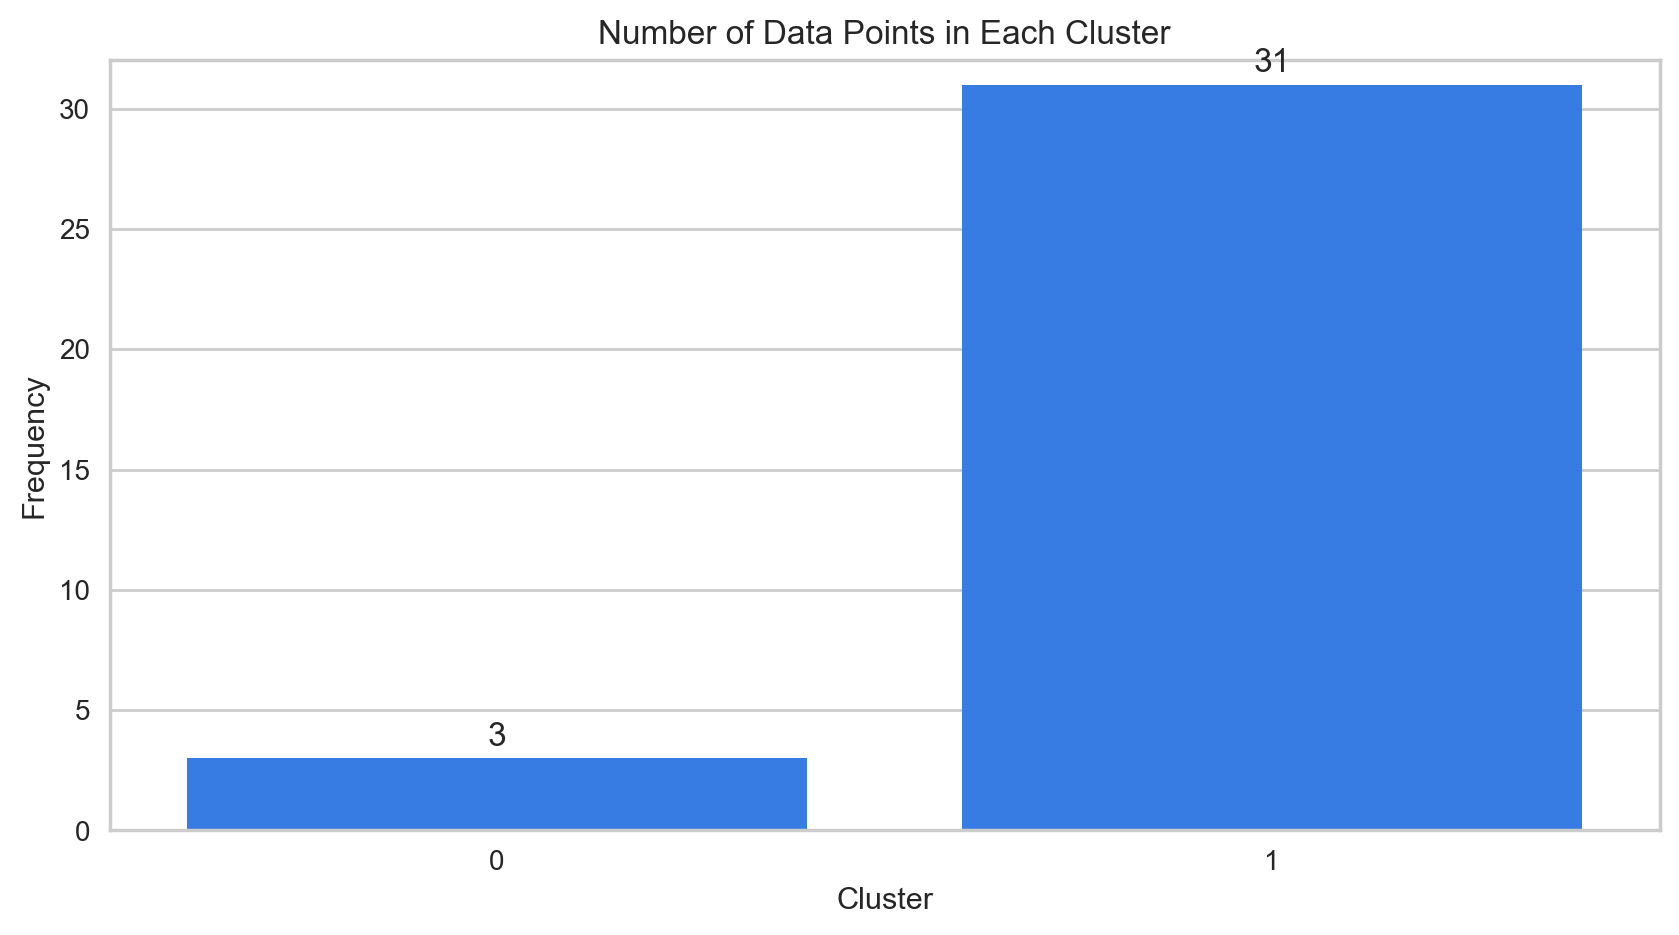

In [28]:
fig,ax = plt.subplots(figsize=(10,5),dpi=200)

sns.countplot(data=df_labeled,x="Cluster",color="#1a76ff")
ax.set_title("Number of Data Points in Each Cluster")
ax.set_ylim(ymax=32)
ax.set_ylabel("Frequency")

for bars in ax.containers:
    ax.bar_label(bars,fmt="%.0f",padding=2,fontweight=500)

plt.show()

In [29]:
from scipy.stats import f_oneway

stats, p_values = [], []
for feature in df_t.columns:
    groups = [df_t[feature][kmeans_model.labels_ == label] for label in range(kmeans_model.n_clusters)]
    stat, p_value = f_oneway(*groups)
    stats.append(stat)
    p_values.append(p_value)

anova = pd.DataFrame(
    data={"F": stats, "P-Value": p_values},
    index=[f"Variabel {cluster + 1}" for cluster in range(len(stats))]
)
anova

,F,P-Value
Variabel 1,0.036168,8.503700e-01
Variabel 2,153.425981,9.465681e-14
Variabel 3,69.170566,1.676254e-09
Variabel 4,0.026253,8.723036e-01
Variabel 5,0.401415,5.308623e-01
Variabel 6,0.051419,8.220552e-01
Variabel 7,58.468816,1.029039e-08
Variabel 8,83.466029,1.971527e-10
Variabel 9,8.640214,6.059497e-03
Variabel 10,77.783630,4.461509e-10


Berdasarkan hasil ANOVA:
* Variabel 2, 3, 7, 8, 9, dan 10: Memiliki perbedaan yang signifikan antara cluster dan merupakan variabel-variabel penting dalam clustering ini.
* Variabel 1, 4, 5, 6, dan 11: Tidak menunjukkan perbedaan yang signifikan antara cluster, sehingga kontribusinya terhadap pemisahan cluster lebih kecil.

In [30]:
# Menambahkan Kolom baru 'KMEANS_SEGMENT' pada Dataframe.
labels = kmeans_model.labels_
cluster_centers = kmeans_model.cluster_centers_

In [31]:
# Menghitung metrik-metrik evaluasi
Inertia = round(kmeans_model.inertia_, 2)
silhouette_avg_kmeans = round(silhouette_score(df_t, labels), 5)
davies_bouldin_kmeans = round(davies_bouldin_score(df_t, labels), 5)
calinski_harabasz_kmeans = round(calinski_harabasz_score(df_t, labels), 5)

test_kmeans = pd.DataFrame({'KMeans': [Inertia, silhouette_avg_kmeans,
                                       davies_bouldin_kmeans,
                                       calinski_harabasz_kmeans]},
index=['Inertia', 'Silhouette Score', 'Davies-Bouldin', 'Calinski-Harabasz'])
test_kmeans

,KMeans
Inertia,236.93000
Silhouette Score,0.55118
Davies-Bouldin,0.78313
Calinski-Harabasz,17.02695


Selanjutnya adalah analisis clustering dengan menggunakan variabel-variabel yang signifikan.

# Feature Selection

In [32]:
df1 = df[['Base Transceiver Station (BTS)', 'Penerima Sinyal Internet 4G/LTE ', 'Angka Pengobatan Lengkap TB',
           'Angka Keberhasilan Pengobatan TB', 'Angka Kematian TB', 'Kasus TBC' ]]

In [33]:
# Transformasi data menggunakan zscore
df_t1 = df1.copy().apply(zscore,ddof=1)
df_t1.head(10)

,Base Transceiver Station (BTS),Penerima Sinyal Internet 4G/LTE,Angka Pengobatan Lengkap TB,Angka Keberhasilan Pengobatan TB,Angka Kematian TB,Kasus TBC
Provinsi,,,,,,
Aceh,0.361327,1.632149,-0.186554,-0.260745,-0.446331,-0.254904
Sumatera Utara,1.200946,1.348288,0.683905,0.689885,-0.375773,0.599849
Sumatera Barat,-0.169943,-0.380360,-0.218812,-0.187340,-0.293609,-0.185038
Riau,0.092844,-0.158164,-0.074346,-0.103312,-0.371289,-0.127211
Jambi,-0.326151,-0.296272,-0.454474,-0.463825,-0.037109,-0.444811
Sumatera Selatan,0.286477,0.341778,0.208222,0.171391,0.201981,0.118442
Bengkulu,-0.569413,-0.323282,-0.544450,-0.568552,-0.805560,-0.545615
Lampung,0.205119,0.176150,-0.011573,0.109775,0.868683,0.020732
Kep. Bangka Belitung,-0.651585,-0.738117,-0.561364,-0.588085,-0.484536,-0.561591


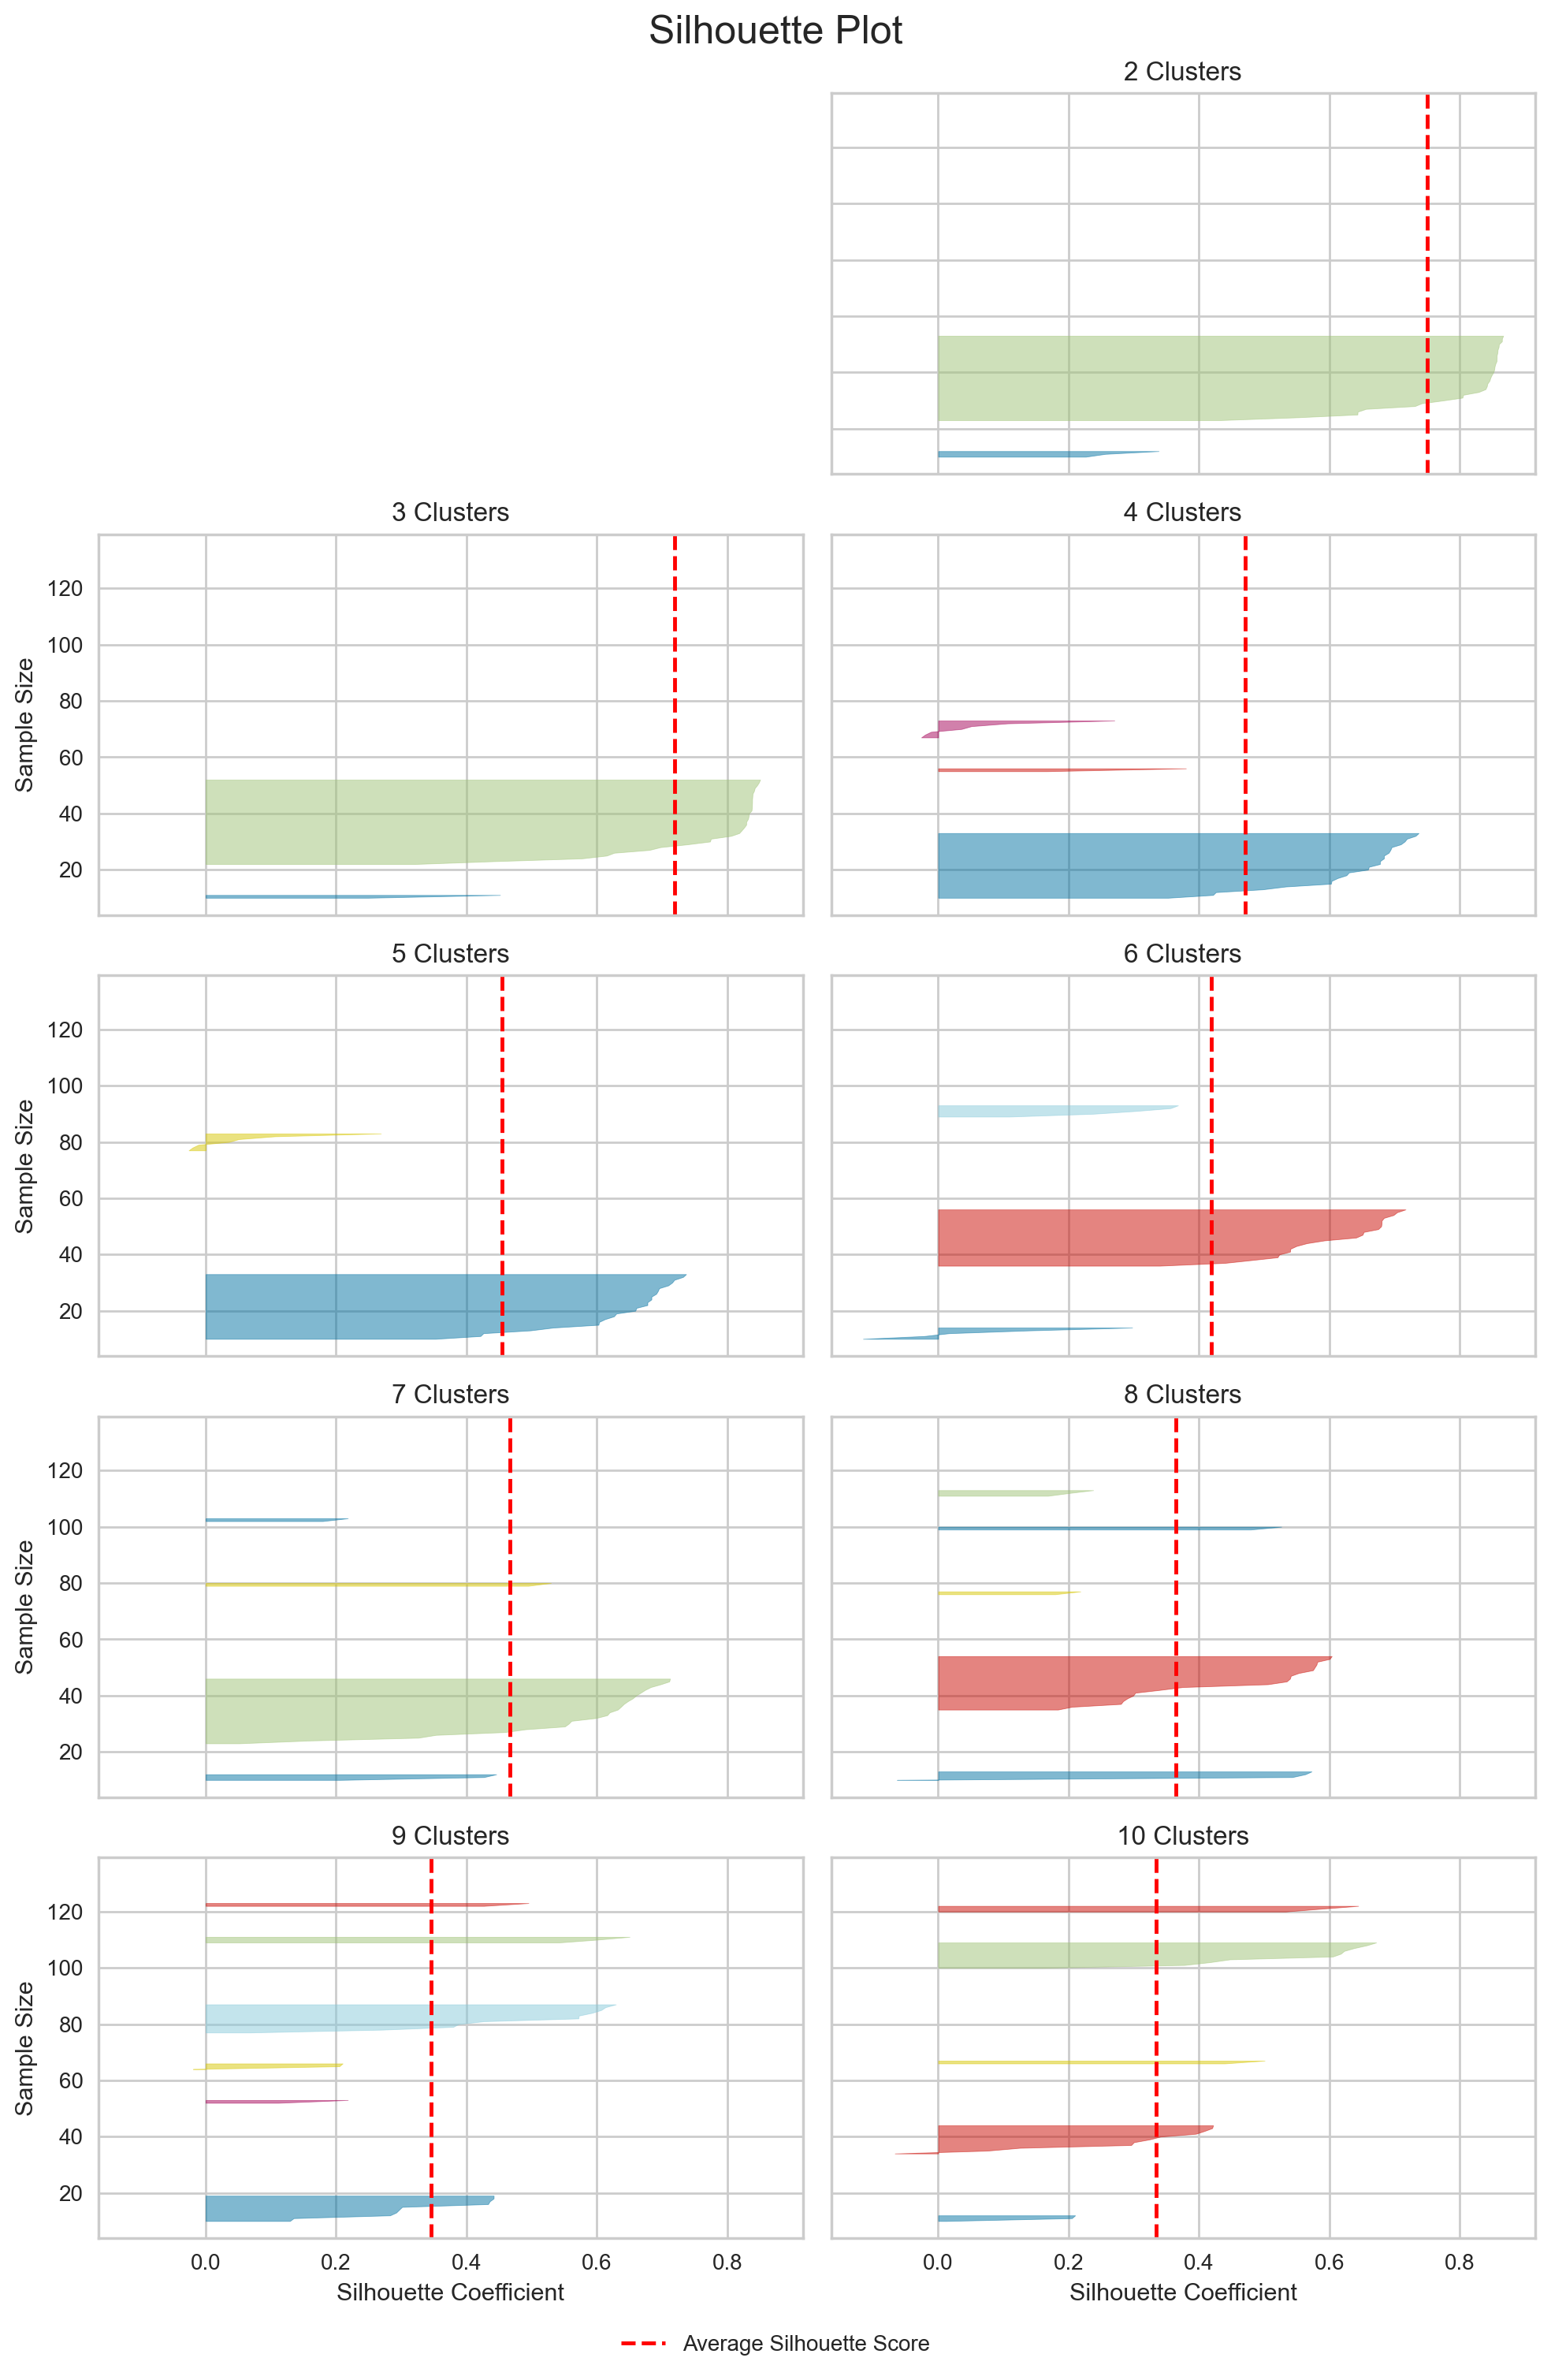

In [34]:
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer

start = 2
end = 10

nrow,ncol = 5,2
fig,ax = plt.subplots(nrow,ncol,figsize=(10,15),dpi=200,sharex=True,sharey=True)

for k in range(start,end + 2):
    q,mod = divmod(k,2)

    if ((q - 1) == 0) & (mod == 0):
        pass
    else:
        k -= 1
        kmeans_model1 = KMeans(n_clusters=k,init="k-means++",random_state=random_state)
        visualizer = SilhouetteVisualizer(kmeans_model1,colors="yellowbrick",ax=ax[q - 1][mod])
        visualizer.fit(df_t1)

        ax[q - 1][mod].set_title(f"{k} Clusters")
        
        if mod == 0:
            ax[q - 1][mod].set_ylabel("Sample Size")
        if (q - 1) == (nrow - 1):
            ax[q - 1][mod].set_xlabel("Silhouette Coefficient")

for axes in ax.flat:
    if not bool(axes.has_data()):
        fig.delaxes(axes)
    
handles,labels = ax[q - 1][mod].get_legend_handles_labels()
fig.legend(handles,labels,loc="center",bbox_to_anchor=(0.5,-0.005))

plt.suptitle("Silhouette Plot",fontsize=18)
plt.tight_layout()
plt.show()

Hasil di atas menunjukkan 2 cluster memiliki nilai yang lebih dengan yang mendekati 1.

# K-Means with Siginificant Variables

In [35]:
kmeans_model1 = KMeans(n_clusters=2, init='k-means++', random_state=21)
kmeans_model1.fit(df_t1)

KMeans(n_clusters=2, random_state=21)

In [36]:
# Menginisialisasi dan melatih model KMedoids
kmeans_model1 = KMeans(n_clusters=2, init='k-means++', random_state=3)
kmeans_model1.fit(df_t1)

# Menyimpan pusat klaster untuk setiap iterasi
clusters = []
for iteration in range(1, kmeans_model1.n_iter_ + 1):
    temp_model = KMeans(n_clusters=2, init='k-means++', random_state=3, max_iter=iteration)
    temp_model.fit(df_t1)
    clusters.append(temp_model.cluster_centers_)

# Mengatur data untuk DataFrame
cluster_data = np.vstack(clusters)

# Membuat MultiIndex untuk DataFrame
first_index = sum([[f"Iteration {iteration}" for _ in range(kmeans_model1.n_clusters)] for iteration in range(1, kmeans_model1.n_iter_ + 1)], [])
second_index = [f"Cluster {cluster + 1}" for cluster in range(kmeans_model1.n_clusters)] * kmeans_model1.n_iter_
multi_index = pd.MultiIndex.from_arrays([first_index, second_index])

# Membuat DataFrame dari sejarah iterasi pusat klaster
iteration_history = pd.DataFrame(
    data=cluster_data,
    columns=df1.columns,
    index=multi_index
)
iteration_history

Base Transceiver Station (BTS)  \
Iteration 1 Cluster 1                       -0.278780   
            Cluster 2                        2.880726   
Iteration 2 Cluster 1                       -0.278780   
            Cluster 2                        2.880726   

                       Penerima Sinyal Internet 4G/LTE   \
Iteration 1 Cluster 1                         -0.253414   
            Cluster 2                          2.618613   
Iteration 2 Cluster 1                         -0.253414   
            Cluster 2                          2.618613   

                       Angka Pengobatan Lengkap TB  \
Iteration 1 Cluster 1                    -0.246383   
            Cluster 2                     2.545953   
Iteration 2 Cluster 1                    -0.246383   
            Cluster 2                     2.545953   

                       Angka Keberhasilan Pengobatan TB  Angka Kematian TB  \
Iteration 1 Cluster 1                         -0.260570          -0.141313   
            Cluster 2                          2.692561           1.460232   
Iteration 2 Cluster 1                         -0.260570          -0.141313   
            Cluster 2                          2.692561           1.460232   

                       Kasus TBC  
Iteration 1 Cluster 1  -0.257972  
            Cluster 2   2.665711  
Iteration 2 Cluster 1  -0.257972  
            Cluster 2   2.665711

In [37]:
final_cluster_centers = pd.DataFrame(
    data=kmeans_model1.cluster_centers_,
    columns=df_t1.columns,
    index=[f"Cluster {cluster}" for cluster in range(kmeans_model1.n_clusters)]
).T
final_cluster_centers

,Cluster 0,Cluster 1
Base Transceiver Station (BTS),-0.278780,2.880726
Penerima Sinyal Internet 4G/LTE,-0.253414,2.618613
Angka Pengobatan Lengkap TB,-0.246383,2.545953
Angka Keberhasilan Pengobatan TB,-0.260570,2.692561
Angka Kematian TB,-0.141313,1.460232
Kasus TBC,-0.257972,2.665711


In [38]:
df_labeled1 = df_t1.copy()
df_labeled1["Cluster"] = kmeans_model1.labels_
df_labeled1["Distance"] = np.min(kmeans_model1.transform(df_t1),axis=1)
df_labeled1

,Base Transceiver Station (BTS),Penerima Sinyal Internet 4G/LTE,Angka Pengobatan Lengkap TB,Angka Keberhasilan Pengobatan TB,Angka Kematian TB,Kasus TBC,Cluster,Distance
Provinsi,,,,,,,,
Aceh,0.361327,1.632149,-0.186554,-0.260745,-0.446331,-0.254904,0,2.015368
Sumatera Utara,1.200946,1.348288,0.683905,0.689885,-0.375773,0.599849,0,2.704564
Sumatera Barat,-0.169943,-0.380360,-0.218812,-0.187340,-0.293609,-0.185038,0,0.250194
Riau,0.092844,-0.158164,-0.074346,-0.103312,-0.371289,-0.127211,0,0.521048
Jambi,-0.326151,-0.296272,-0.454474,-0.463825,-0.037109,-0.444811,0,0.366692
Sumatera Selatan,0.286477,0.341778,0.208222,0.171391,0.201981,0.118442,0,1.151766
Bengkulu,-0.569413,-0.323282,-0.544450,-0.568552,-0.805560,-0.545615,0,0.892753
Lampung,0.205119,0.176150,-0.011573,0.109775,0.868683,0.020732,0,1.307188
Kep. Bangka Belitung,-0.651585,-0.738117,-0.561364,-0.588085,-0.484536,-0.561591,0,0.889037


In [39]:
# Membuat radar chart untuk melihat karakteristik klaster
features = list(df_labeled1.columns[:-2])
num_vars = len(features)

In [40]:
# Jumlah klaster
n_clusters = len(df_labeled1['Cluster'].unique())

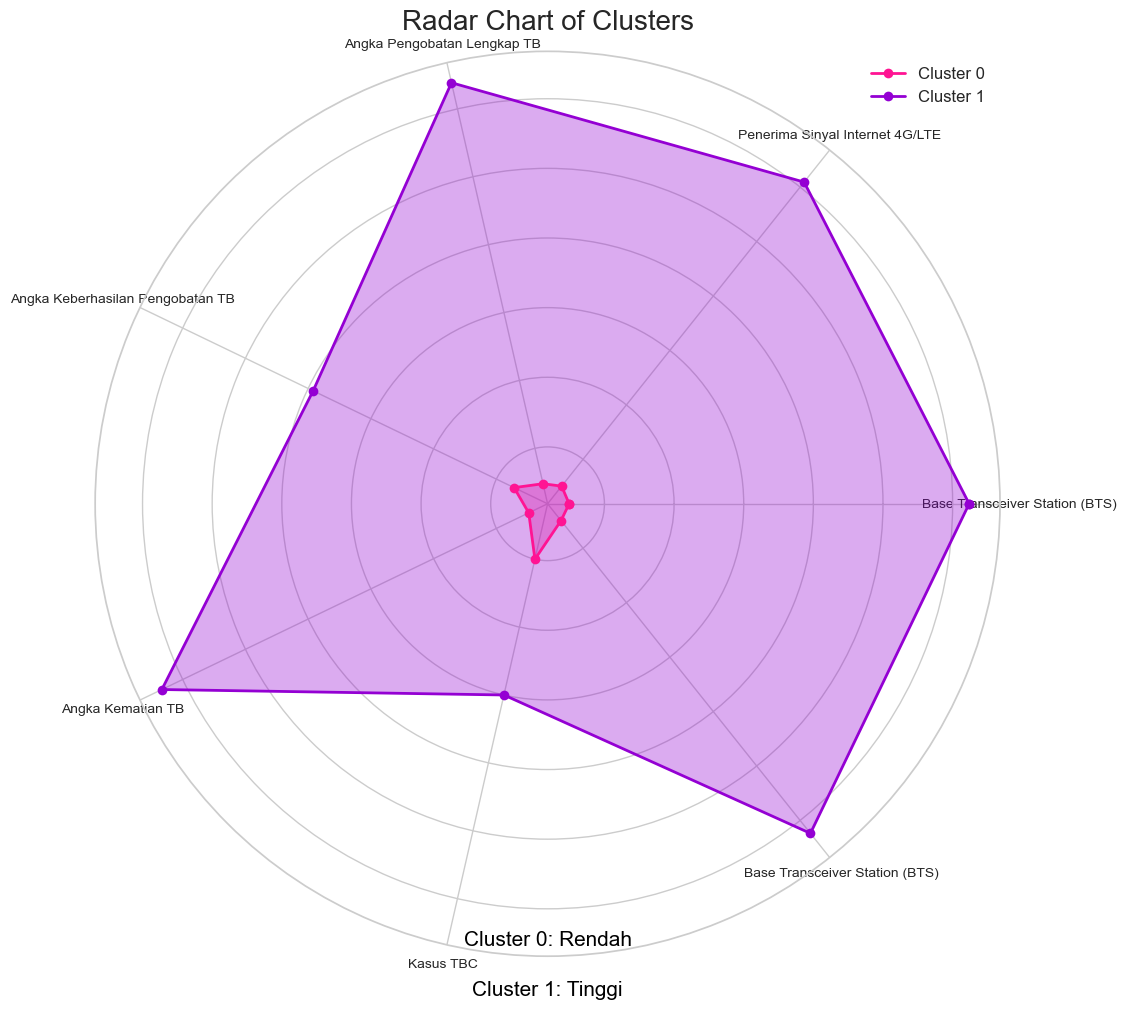

In [41]:
# Daftar warna yang akan digunakan untuk setiap klaster
colors = ['deeppink', 'darkviolet']

# Plot radar chart
plt.figure(figsize=(15, 10))

for i in range(n_clusters):
    cluster_data = df_labeled1[df_labeled1['Cluster'] == i].mean()[1:-1].values
    values = cluster_data
    categories = features

    # Menambahkan kategori pertama ke akhir untuk melengkapi lingkaran radar
    values = np.concatenate((values, [values[0]]))
    categories = np.concatenate((categories, [categories[0]]))

    # Jumlah sudut yang akan digunakan dalam radar chart
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()

    # Menambahkan sudut pertama ke akhir untuk melengkapi lingkaran radar
    values = np.concatenate((values, [values[0]]))
    angles += angles[:1]

    # Membuat plot dengan warna yang berbeda untuk setiap klaster
    ax = plt.subplot(1, 1, 1, polar=True)
    ax.fill(angles, values, color=colors[i], alpha=0.1)
    ax.plot(angles, values, 'o-', color=colors[i], linewidth=2, label='Cluster {}'.format(i))
    ax.fill(angles, values, color=colors[i], alpha=0.25)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, size=10)
    plt.yticks(size=10)

    # Menambahkan keterangan klaster
    cluster_label = 'Tinggi' if i == 1 else 'Rendah'
    plt.figtext(0.5, 0.05 - i * 0.05, 'Cluster {}: {}'.format(i, cluster_label),
                ha='center', va='center', size=15, color='black')

# Menambahkan legenda
plt.legend(loc='upper right', fontsize=12)

plt.title('Radar Chart of Clusters', size=20)
plt.tight_layout()
plt.show()

* Cluster pertama, yang kita sebut sebagai "Cluster 0", mencerminkan daerah-daerah dengan aksesibilitas digital rendah dan indikator kesehatan yang juga rendah terkait TB. Daerah-daerah dalam cluster ini memerlukan perhatian khusus dalam meningkatkan aksesibilitas digital sekaligus menangani masalah TB secara efektif.

* Cluster kedua, atau "Cluster 1" mencerminkan daerah-daerah dengan aksesibilitas digital tinggi dan indikator kesehatan yang tinggi terkait TB. Daerah-daerah ini mungkin sudah maju secara digital dan memiliki akses yang baik terhadap layanan kesehatan, namun masih perlu meningkatkan upaya pencegahan dan penanganan TB untuk memastikan bahwa keberhasilan pengobatan dan angka kematian terkait TB tetap rendah.

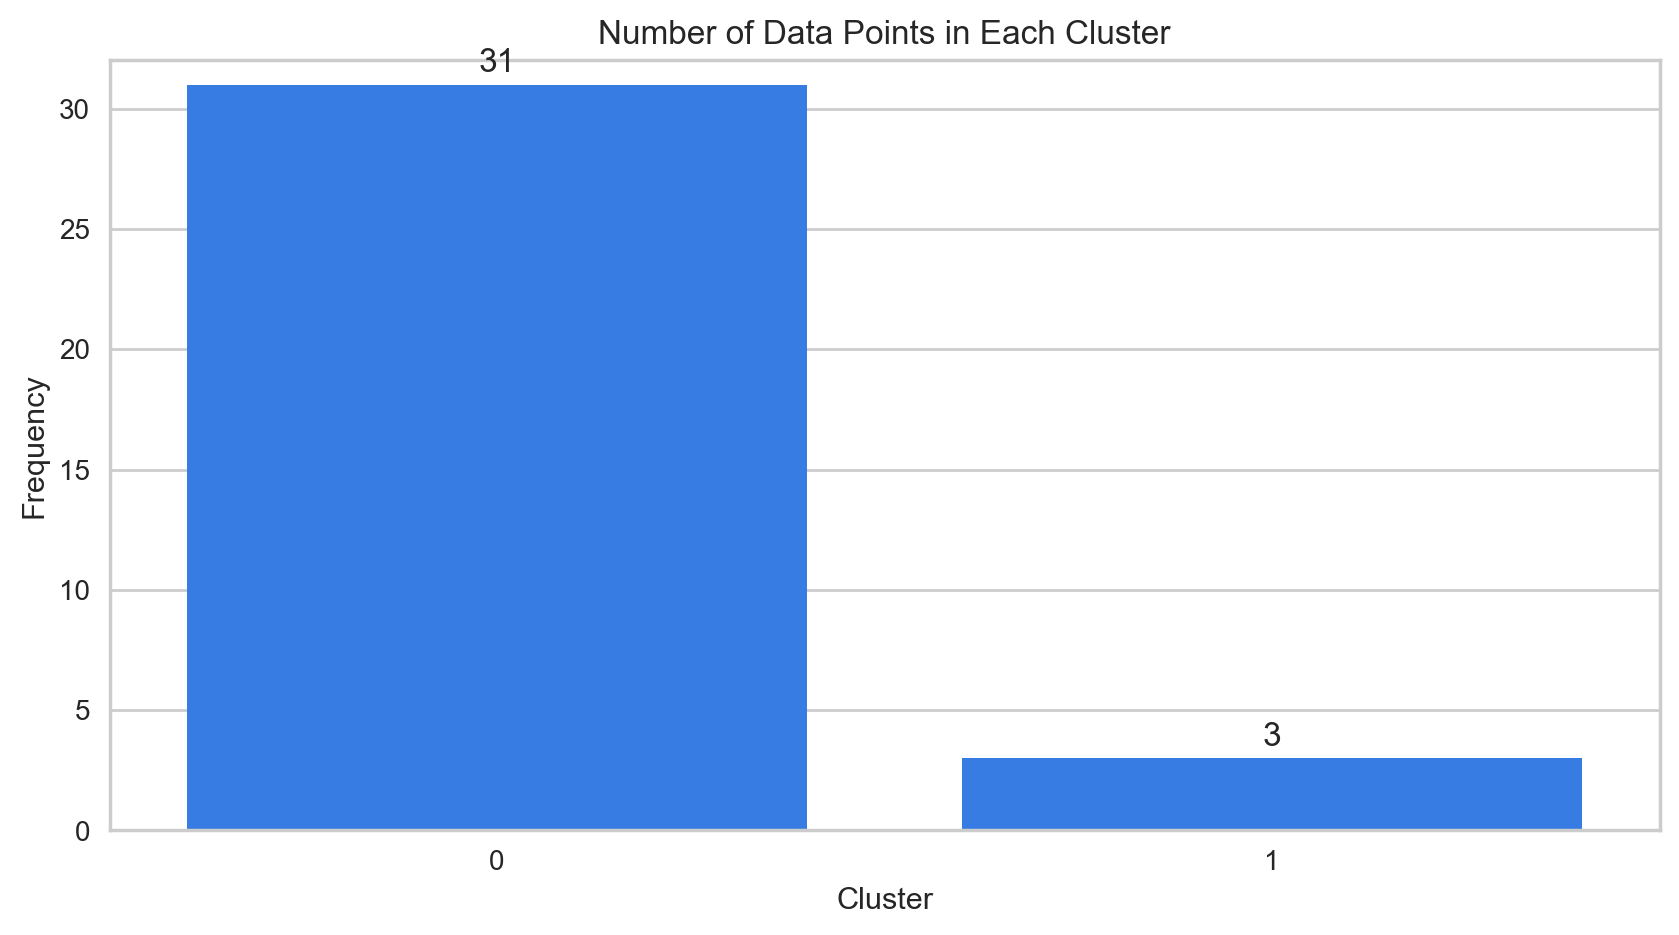

In [42]:
fig,ax = plt.subplots(figsize=(10,5),dpi=200)

sns.countplot(data=df_labeled1,x="Cluster",color="#1a76ff")
ax.set_title("Number of Data Points in Each Cluster")
ax.set_ylim(ymax=32)
ax.set_ylabel("Frequency")

for bars in ax.containers:
    ax.bar_label(bars,fmt="%.0f",padding=2,fontweight=500)

plt.show()

In [43]:
from scipy.stats import f_oneway

stats, p_values = [], []
for feature in df_t1.columns:
    groups = [df_t1[feature][kmeans_model1.labels_ == label] for label in range(kmeans_model1.n_clusters)]
    stat, p_value = f_oneway(*groups)
    stats.append(stat)
    p_values.append(p_value)

anova = pd.DataFrame(
    data={"F": stats, "P-Value": p_values},
    index=[f"Variabel {cluster + 1}" for cluster in range(len(stats))]
)
anova

,F,P-Value
Variabel 1,153.425981,9.465681e-14
Variabel 2,69.170566,1.676254e-09
Variabel 3,58.468816,1.029039e-08
Variabel 4,83.466029,1.971527e-10
Variabel 5,8.640214,6.059497e-03
Variabel 6,77.783630,4.461509e-10


Untuk semua variabel ini, nilai p yang sangat rendah menunjukkan bahwa perbedaan antara cluster sangat signifikan. Ini menunjukkan bahwa variabel-variabel ini berperan penting dalam membedakan cluster.

In [44]:
# Menambahkan Kolom baru 'KMEANS_SEGMENT' pada Dataframe.
labels1 = kmeans_model1.labels_
cluster_centers1 = kmeans_model1.cluster_centers_

In [45]:
# Menghitung metrik-metrik evaluasi
Inertia1 = round(kmeans_model1.inertia_, 2)
silhouette_avg_kmeans1 = round(silhouette_score(df_t1, labels1), 5)
davies_bouldin_kmeans1 = round(davies_bouldin_score(df_t1, labels1), 5)
calinski_harabasz_kmeans1 = round(calinski_harabasz_score(df_t, labels1), 5)

test_kmeans1 = pd.DataFrame({'KMeans': [Inertia1, silhouette_avg_kmeans1,
                                       davies_bouldin_kmeans1,
                                       calinski_harabasz_kmeans1]},
index=['Inertia', 'Silhouette Score', 'Davies-Bouldin', 'Calinski-Harabasz'])
test_kmeans1

,KMeans
Inertia,72.55000
Silhouette Score,0.75009
Davies-Bouldin,0.59529
Calinski-Harabasz,17.02695


Untuk semua variabel ini, nilai p yang sangat rendah menunjukkan bahwa perbedaan antara cluster sangat signifikan. Ini menunjukkan bahwa variabel-variabel ini berperan penting dalam membedakan cluster.

**Kesimpulan:**
Dari hasil clustering, dapat disimpulkan bahwa aksesibilitas digital tinggi juga memiliki tingkat kesehatan yang tinggi terkait TB dapat dijelaskan oleh beberapa faktor. Salah satunya adalah adanya koneksi antara aksesibilitas digital dan pelayanan kesehatan, di mana daerah dengan aksesibilitas digital tinggi cenderung memiliki aksesibilitas terhadap pelayanan kesehatan yang lebih baik. Selain itu, pendidikan dan kesadaran masyarakat yang lebih baik juga dapat berperan dalam meningkatkan pemahaman tentang TB dan tindakan pencegahan yang diperlukan. Hasil clustering dengan algoritma KMedoids dapat dikatakan cukup baik dengan nilai Silhouette Score yang tinggi (0.75), nilai Davies-Bouldin yang rendah (0.59529), dan nilai Calinski-Harabasz yang cukup tinggi (17.02695). Ini menunjukkan bahwa cluster-cluster yang dihasilkan relatif homogen internalnya dan heterogen eksternalnya, serta cukup terpisah satu sama lain. 